In [1]:
import numpy as np
import pandas as pd

from db_form import parameters_form           # Yoni's form code.
from db_dataverse import SampleDataverseTable # Dataverse code based on scripts by Felix.
from db_dataverse import JVScanDataverseTable # 

from datetime import date, datetime
import time
import os

import json

import lmfit as lm

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Step 1 $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#   Database parameters for the sample database.                         #
#   For Sample_Data on  Perovskite Data Developer, Verde Technologies.   #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

# It may be necessary to use the 'Connect' command in Powershell to change the user before running this cell.
#crm_url =  "https://orgc25b23b3.api.crm.dynamics.com/"        # Randall Headrick's Environment at UVM.
crm_url = "https://perovskitedevelop.api.crm.dynamics.com/"    # Perovskite Data Developer Environment at VerdeTechnologies. 

#sample_table_logical_name =  "cr69a_sampledatav2s"
sample_table_logical_name =  "crf3d_sample_datas"               # Perovskite Data Developer, Dataverse table.

# This is not a complete list, only a few that might be helpful to identify the sample.
Sample_table_logical_names = {
    "Sample ID": 'crf3d_sampleid', 
    "Operator": 'crf3d_operatorname', 
    "Perovskite Composition": 'crf3d_perovskitecomposition', 
    "HTL Material": 'crf3d_htlmaterial', 
    "ETL Material": 'crf3d_etlmaterial',
    "Top Capping Material": 'crf3d_topcappingpassivationmaterial', 
    "Bottom Capping Material": 'crf3d_bottomcappingpassivationmaterial', 
    "Bulk Passivation Materials": 'new_bulkpassivationmaterial', 
    "Is Encapsulated": 'crf3d_isencapsulated'
}
 
# View a list of samples in the database.
last_num= 1500  ################### The number of Sample records to view, most recent first.############
sample_table = SampleDataverseTable(crm_url, sample_table_logical_name, col_logical_names=Sample_table_logical_names)
sample_ids, sample_recent_values, result = sample_table.recent_entries(last_num)
# print(sample_ids)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #


#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Step 2 $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#   Database parameters for the jv scan database.                        #
#   For J-V_Scan_Data on  Perovskite Data Developer, Verde Technologies. #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

#JV_scan_table_logical_name = "cr69a_jv_test_data_v3s"
JV_scan_table_logical_name = "crf3d_jv_test_datas"              # Perovskite Data Developer, Dataverse table.

col_logical_names = {
    'sample_id': 'crf3d_sample_id',
    'elapsed_time': 'crf3d_elapsed_time_sec',
    'base_time': 'crf3d_base_time_sec',  # New base_time value.
    'test_id': 'crf3d_test_id',
    'i_ph_suns': 'crf3d_iph_suns',
    'voc_v': 'crf3d_voc_v',
    'mpp_v': 'crf3d_mpp_v',
    'jsc_ma': 'crf3d_jsc_macm2',
    'rsh': 'crf3d_rsh',
    'rser': 'crf3d_rser',
    'ff': 'crf3d_ff_pct',
    'pce': 'crf3d_pce_pct',
    'operator': 'crf3d_operator_name',
    'scan_type': 'crf3d_scan_type',
    'lab_location': 'crf3d_location',
    'cell_number': 'crf3d_cell_number',
    'module': 'crf3d_module',
    'masked': 'crf3d_masked',
    'mask_area': 'crf3d_mask_area_cm2',
    'temp_c': 'crf3d_temperature_c',  # New.
    'hum_pct': 'crf3d_humidity_pct', # New.
    'four_wire_mode': 'crf3d_four_wire_mode', # New.
    'scan_data_path': 'crf3d_scan_path' # New.
}
image_column_name = 'new_jv_scan_plot'  # Optional column.

# Set up the J-V_Test_Data table.
jv_test_table = JVScanDataverseTable(crm_url=crm_url, table_name=JV_scan_table_logical_name, col_logical_names=col_logical_names)

# Retrieve the last num_vals of the jv test data.
num_vals= 5000
jv_test_ids, jv_test_recent_values, jv_test_result = jv_test_table.recent_entries(num_vals)
#print(jv_test_ids)


In [3]:
# sample_recent_values

In [4]:
jv_test_recent_values

,sample_id,elapsed_time,base_time,test_id,i_ph_suns,voc_v,mpp_v,jsc_ma,rsh,rser,...,scan_type,lab_location,cell_number,module,masked,mask_area,temp_c,hum_pct,four_wire_mode,scan_data_path
0,050225_FAPI_SA_Cr_Cu_C8,15.8,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_6R_123553,0.8,0.96,0.55,15.71,148.19,28.04,...,R,Upstairs (W426),6,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
1,050225_FAPI_SA_Cr_Cu_C8,15.73,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_6F_123553,0.8,0.9,0.53,14.14,77.13,32.85,...,F,Upstairs (W426),6,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
2,050225_FAPI_SA_Cr_Cu_C8,14.75,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_5R_123451,0.8,0.96,0.69,18.68,289.94,11.64,...,R,Upstairs (W426),5,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
3,050225_FAPI_SA_Cr_Cu_C8,14.69,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_5F_123451,0.8,0.9,0.57,17.61,100.78,22.76,...,F,Upstairs (W426),5,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
4,050225_FAPI_SA_Cr_Cu_C8,13.27,1747844410.46,050225_FAPI_SA_Cr_Cu_C8_4R_123321,0.8,0.98,0.71,19.94,400.8,8.3,...,R,Upstairs (W426),4,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,110524_FAPI_SA_Nano C PCB6_spun BCP_C4,27.86,1730986763.7,110524_FAPI_SA_Nano C PCB6_spun BCP_C4_4R_090710,0.85,1.11,0.91,22.37,3398.15,5.31,...,R,Upstairs (W426),4,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
4996,110524_FAPI_SA_Nano C PCB6_spun BCP_C4,27.79,1730986763.7,110524_FAPI_SA_Nano C PCB6_spun BCP_C4_4F_090710,0.85,1.09,0.89,21.76,484.51,5.8,...,F,Upstairs (W426),4,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
4997,110524_FAPI_SA_Nano C PCB6_spun BCP_C4,26.63,1730986763.7,110524_FAPI_SA_Nano C PCB6_spun BCP_C4_5R_090556,0.85,1.11,0.93,22.45,2934.56,4.48,...,R,Upstairs (W426),5,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...
4998,110524_FAPI_SA_Nano C PCB6_spun BCP_C4,26.55,1730986763.7,110524_FAPI_SA_Nano C PCB6_spun BCP_C4_5F_090556,0.85,1.08,0.89,21.92,530.14,4.77,...,F,Upstairs (W426),5,False,False,0,23,0,False,C:\Users\LabUser\OneDrive - Verde Technologies...


In [5]:
jv_test_recent_values['scan_data_path'][0]

'C:\\Users\\LabUser\\OneDrive - Verde Technologies\\Documents\\data2\\K2401SSDB\\Pramod_052125/050225_FAPI_SA_Cr_Cu_C8_6R_123553.csv'

In [6]:
### X.X ###
# Everything should be relative to jupyter_notebook_path.  
# There will be other folders created,such as ../{operator}_{date}
jupyter_notebook_path = os.getcwd()
%pwd

'C:\\Users\\takaj\\Desktop\\VerdeDBTakaji'

In [7]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Sample ID filtering $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                           Change the filters below to select a list of samples.                         #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

sample_filter_1 = '05072025' 
#sample_filter_1 = '01272025'       # Change this to filter a range of samples.        Use '' to match everything.
sample_filter_2 = ''      # Use this one to narrow or broaden the filter.    Use '' to match everything. 
sample_filter_operator = 'and'       # Operator for sample_filter_1 and _2.

if sample_filter_operator == 'and':
    sample_id_list = [sample_id for sample_id in sample_ids if (sample_filter_1 in sample_id) and (sample_filter_2 in sample_id)]
elif sample_filter_operator == 'or':
    sample_id_list = [sample_id for sample_id in sample_ids if (sample_filter_1 in sample_id) or (sample_filter_2 in sample_id)]
else:
    sample_id_list = []
    raise Exception("sample_filter_operator must be either \'and\' or \'or\'.")

sample_id_list

['05072025_Module_M4',
 '05072025_Module_M2',
 '05072025_CubicPV_VRD-5_dev4',
 '05072025_CubicPV_VRD-5_dev1',
 '05072025_CubicPV_CCP1-20_dev13',
 '05072025_CubicPV_CCP1-20_dev12',
 '05072025_Module_M1']

In [8]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Get the operator name $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                       Use the 'operator' for the first 'sample_id' as the default.                      #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

jv_test_operator_list = list(jv_test_recent_values[ 'operator' ])
jv_test_sample_id_list = list(jv_test_recent_values[ 'sample_id' ])
ind = jv_test_sample_id_list.index(sample_id_list[0])                # index of the first sample in sample_id_list
default_operator =   str(jv_test_operator_list[ind])

operator = input("Operator name: ") or default_operator
if operator == default_operator:
    print(f"                {operator}")

dir_path_local = os.path.normpath(os.path.join(jupyter_notebook_path, f"../Reports/{operator}")) 

today = date.today()
#today = date(2025, 2, 26)
path = dir_path_local + "_" + today.strftime("%m%d%y")
print(path)

Operator name:  


                Seid
C:\Users\takaj\Desktop\Reports\Seid_052125


In [9]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Form parameters $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
# Operator        # This will be a fixed value, changeable in the cell above.                    #
# Sample names    # Select multiple samples                                                      #
# Parameters to plot: PCE, FF, Voc, Jsc, MPP, Rser, Rshunt   # radio buttons.                    #
# Plot type.  Choice of either Time series (one sample) or Box plot (compares up to 4 samples).  #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

# The questions json file can be anywhere, but it will usually be in the directory with this Notebook.
questions_file_main= os.path.join(jupyter_notebook_path, "main_questions.json")

form = parameters_form(persistent=True, dir_path_local=dir_path_local, 
                               questions_file_main=questions_file_main, checkbox_values=sample_id_list)
print(form.checkbox_values)
form.display_question_canvas()

['05072025_Module_M4', '05072025_Module_M2', '05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1', '05072025_CubicPV_CCP1-20_dev13', '05072025_CubicPV_CCP1-20_dev12', '05072025_Module_M1']


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Button(button_style='success', description='Submit', style=ButtonStyle())

In [12]:
# Check to make sure the responses are what you want.
print(form.responses)

['Seid', [False, False, True, True, True, True, False], 'PCE (%)', 'reverse', 'Box plot']


In [13]:
### X.X  ###
# Convert the form responses into a dictionary for easier indexing.
form_questions = [question['question'] for question in form.questions]

form_responses_new = list(form.responses)
sample_id_filter = form_responses_new[1] # position [1] refers to the sample id checkbox responses.
form_responses_new[1] = [id for indx,id in enumerate(sample_id_list) if sample_id_filter[indx] == True]
form_responses_dictionary = dict(zip(form_questions, form_responses_new))


print(form_responses_dictionary)
print("-")

# Check if the form responses are valid.
if len(form_responses_dictionary['Sample names? (select up to four)']) == 0:
    raise Exception("At least one sample must be selected.")
elif form_responses_dictionary["Plot type?"] == "Box plot":
    if len(form_responses_dictionary['Sample names? (select up to four)'])  > 4:
        raise Exception("No more than four samples should be selected for Box plot.")
elif form_responses_dictionary["Plot type?"] == "Time series":
        if len(form_responses_dictionary['Sample names? (select up to four)'])  > 1:
            raise Exception("Only one sample should be selected for Time series.")
             
print("Form responses are valid.")

{'Operator': 'Seid', 'Sample names? (select up to four)': ['05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1', '05072025_CubicPV_CCP1-20_dev13', '05072025_CubicPV_CCP1-20_dev12'], 'Parameter to plot?': 'PCE (%)', 'Scan direction?': 'reverse', 'Plot type?': 'Box plot'}
-
Form responses are valid.


In [14]:
form_responses_dictionary['Sample names? (select up to four)']

['05072025_CubicPV_VRD-5_dev4',
 '05072025_CubicPV_VRD-5_dev1',
 '05072025_CubicPV_CCP1-20_dev13',
 '05072025_CubicPV_CCP1-20_dev12']

In [15]:
# timestamp conversion functions.

def epoch_to_timestamp(ts):
    '''Convert a unix epoch to a YYYY-MM-DD hh:mm:ss timestamp'''
    return datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

def timestamp_to_epoch(dt):
    '''Convert YYYY-MM-DD hh:mm:ss timestamp string to a unix epoch'''
    datetime_obj = datetime.strptime(dt, "%Y-%m-%d %H:%M:%S")
    return  datetime_obj.timestamp()

In [16]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Create a list of Dataframes $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#               Each dataframe in 'jv_test_data_list' holds JV data for a different sample.               #
#                  The corresponding sample ids are in the list  'sample_ids_selected'.                   #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
sample_ids_selected = form_responses_dictionary['Sample names? (select up to four)']
jv_test_data_list = []    # This list will hold one dataframe of JV data for each sample_id.
for sample_id in sample_ids_selected:
   jv_test_data_list.append(jv_test_recent_values[jv_test_recent_values["sample_id"]==sample_id])

PCE (%)
PCE (%)
pce


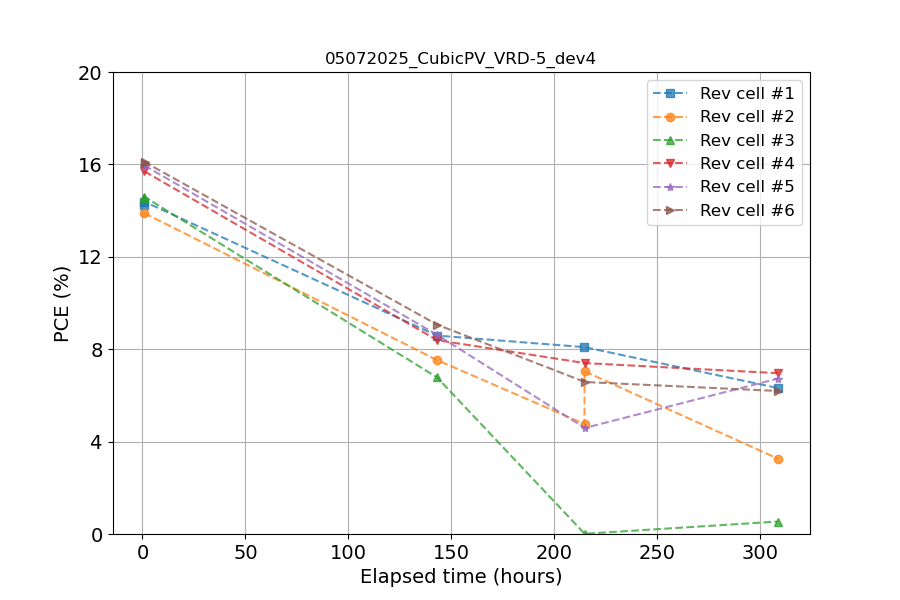

In [17]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ First look at the JV data $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                The simplest plot is time. Plot the JV data for the first selected sample.               #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

# Look at the first sample in the selection list.
sample_id = sample_ids_selected[0]
df = jv_test_data_list[0]

# Select just the columns I need for the analaysis.
df2 = df[['cell_number','pce', 'voc_v', 'ff', 
          'jsc_ma', 'scan_type', 'mpp_v', 'rser', 'rsh']].copy()  # to do: add 'test_status' to the list of columns.

# Reconstruct the timestamp from the unix epoch.
tsl = df['base_time'].astype(float)+60.0*df['elapsed_time'].astype(float)
timestamp_series = tsl.apply(epoch_to_timestamp)

# Insert the timestamp into the dataframe with column heading "measured_on".
df2.insert(0,"measured_on", timestamp_series)
MIN_BASE_TIME = min(df['base_time'].astype(float))
df2.insert(1,"time_hrs", (tsl-MIN_BASE_TIME)/3600)

# Split the data into forward and reverse scan types.
df2_fwd = df2.loc[df['scan_type'] == 'F']
df2_rev = df2.loc[df['scan_type'] == 'R']

# Selected parameter to plot.
parameter_ylabel = form_responses_dictionary['Parameter to plot?']
print(parameter_ylabel)
if parameter_ylabel == 'PCE (%)':
    parameter_to_plot = "pce"
elif parameter_ylabel == 'FF (%)':
    parameter_to_plot = "ff"
elif parameter_ylabel == 'Voc (V)':
    parameter_ylabel = r'V$_{oc}$ (V)'
    parameter_to_plot = "voc_v"
elif parameter_ylabel == 'Jsc (mA/cm^2)':
    parameter_ylabel = r'J$_{sc}$ (mA/cm$^2$)'
    parameter_to_plot = "jsc_ma"
elif parameter_ylabel == 'MPP (V)':
    parameter_to_plot = "mpp_v"
elif parameter_ylabel == 'Rser (Ohm-cm^2)':
    parameter_ylabel = r'R$_{ser}$ (Ohm-cm$^2$)'
    parameter_to_plot = "rser"
elif parameter_ylabel == 'Rsh (Ohm-cm^2)':
    parameter_ylabel = r'R$_{sh}$ (Ohm-cm$^2$)'
    parameter_to_plot = "rsh"
else:
    raise Exception("Invalid parameter ylabel")
print(parameter_ylabel)
print(parameter_to_plot)

# Set the font.
plt.rcParams.update({'font.size': 14})

# Make the plot.
fig, ax = plt.subplots(figsize=(9,6))
direction_response = form_responses_dictionary["Scan direction?"] 
# If we are plotting both Fwd and Rev, then don't label individual cell numbers.
if direction_response == "both":
    alpha_val = 0.5
    plt.plot(df2_rev["time_hrs"], df2_rev[parameter_to_plot].astype(float), 'co', label="Reverse sweep", alpha=alpha_val)
    plt.plot(df2_fwd["time_hrs"], df2_fwd[parameter_to_plot].astype(float), 'ro', label="Forward sweep", alpha=alpha_val)
# If we are plotting only one direction then we will label individual cell numbers.
elif (direction_response == "forward") or (direction_response == "reverse"):
    if direction_response == "forward":
        dir = "Fwd"
        symbols = ['.', 's--', 'o--', '^--', 'v--', '*--', '>--']
        alpha_val = 0.75
        for cellnum in range(1,7):
            df2_onecell = df2_fwd.loc[df2_fwd['cell_number'] == str(cellnum)]
            if len(df2_onecell) > 0:
                plt.plot(df2_onecell["time_hrs"], df2_onecell[parameter_to_plot].astype(float), 
                     symbols[cellnum], label=f"{dir} cell #{cellnum}", alpha=alpha_val)
    else:
        dir = "Rev"
        symbols = ['.', 's--', 'o--', '^--', 'v--', '*--', '>--']
        alpha_val = 0.75
        for cellnum in range(1,7):
            df2_onecell = df2_rev.loc[df2_rev['cell_number'] == str(cellnum)]
            df2_onecell = df2_onecell.sort_values(by='time_hrs')
            if len(df2_onecell) > 0:
                #
                # try:
                #     xdata = np.array(df2_onecell["time_hrs"].astype(float))
                #     # print("xdata=", xdata)
                #     ydata = np.array(df2_onecell[parameter_to_plot].astype(float))
                #     # print("ydata=", ydata)
                #     model = lm.Model(Constant) - lm.Model(Stretch_Exp)
                #     params = model.make_params()
                #     params['constant'].set(ydata[-1],min=0.0001,max=10)
                #     params['amp'].set(-ydata[0]+ydata[-1])
                #     params['tau'].set(200,min=20,max=9999.9)
                #     params['shift'].set(xdata[0])
                #     params['beta'].set(1.0,min=0.8,max=1.2)
                #     print("xdata=",xdata," \nydata=",ydata)
                #     result = model.fit(ydata,params,x=np.array(xdata))
                #     y0 = result.best_fit
                #     print(" \ny0=",y0)
                #     print(result.best_values)
                #     # result.plot_fit(show_init=True)
                #     plt.plot(xdata,y0,'-')
                #     print("----")
                # except:
                #     print("Error for cell # ",cellnum)
                #     print("----")
                #
                plt.plot(df2_onecell["time_hrs"], df2_onecell[parameter_to_plot].astype(float), 
                     symbols[cellnum], label=f"{dir} cell #{cellnum}", alpha=alpha_val)
               


plt.xlabel("Elapsed time (hours)")
plt.ylabel(parameter_ylabel)
plt.title(sample_id, fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.ylim(0,20)
ax.set_yticks([0,4,8,12,16,20])

In [18]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [19]:
print("                               ",color.DARKCYAN + color.BOLD + sample_id)
df2[df2['cell_number']=='5']

                                05072025_CubicPV_VRD-5_dev4


,measured_on,time_hrs,cell_number,pce,voc_v,ff,jsc_ma,scan_type,mpp_v,rser,rsh
51,2025-05-20 09:18:49,308.718172,5,6.73,0.89,52.66,14.3,R,0.61,14.36,831.98
52,2025-05-20 09:18:44,308.717006,5,3.78,0.84,33.24,13.47,F,0.55,16.9,57.92
233,2025-05-16 11:23:44,214.800194,5,4.59,0.69,49.8,13.39,R,0.42,15.69,-636.86
234,2025-05-16 11:23:40,214.799194,5,2.49,0.62,34.11,11.84,F,0.38,26.2,50.5
349,2025-05-13 11:43:28,143.129206,5,8.62,1.08,53.22,14.99,R,0.76,14.9,730.68
350,2025-05-13 11:43:24,143.128039,5,5.64,1.06,34.39,15.49,F,0.67,16.75,63.49
652,2025-05-07 13:36:25,1.011667,5,15.95,1.09,67.33,21.81,R,0.81,8.81,6735.46
653,2025-05-07 13:36:21,1.010500,5,12.9,1.05,56.22,21.78,F,0.71,11.21,2339.02
654,2025-05-07 13:33:24,0.961333,5,15.93,1.09,66.86,21.81,R,0.81,9.16,7024.48
655,2025-05-07 13:33:19,0.960000,5,12.71,1.06,55.37,21.74,F,0.71,12.93,2531.24


In [20]:
print("                               ", color.DARKCYAN + color.BOLD + sample_id)
df2_rev.sort_values(by='time_hrs')

                                05072025_CubicPV_VRD-5_dev4


,measured_on,time_hrs,cell_number,pce,voc_v,ff,jsc_ma,scan_type,mpp_v,rser,rsh
666,2025-05-07 13:26:23,0.844500,1,14.23,0.97,69.89,20.89,R,0.75,6.99,-23157.31
664,2025-05-07 13:27:29,0.862833,1,14.39,0.98,70.14,20.85,R,0.75,7.06,3745.22
662,2025-05-07 13:28:33,0.880500,2,13.89,0.96,69.67,20.71,R,0.73,7.24,4872.8
660,2025-05-07 13:29:40,0.899167,3,14.53,1,70.04,20.84,R,0.77,7.16,3670.79
658,2025-05-07 13:30:54,0.919667,3,14.6,1,69.97,20.83,R,0.77,7.2,2901.91
656,2025-05-07 13:32:13,0.941500,4,15.7,1.1,65.6,21.85,R,0.81,9.46,4249.5
654,2025-05-07 13:33:24,0.961333,5,15.93,1.09,66.86,21.81,R,0.81,9.16,7024.48
652,2025-05-07 13:36:25,1.011667,5,15.95,1.09,67.33,21.81,R,0.81,8.81,6735.46
650,2025-05-07 13:39:17,1.059500,6,16.06,1.09,67.96,21.76,R,0.81,8.47,-10671.74
648,2025-05-07 13:40:23,1.077833,6,16.1,1.09,68.03,21.76,R,0.81,8.49,21897.98


In [21]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ Data clumping parameters $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
#                                                                                                         #
#                       They are used to group data points in the time-series plot.                       #
#                                                                                                         #
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#
min_gap_width   = 1.0   # hours.  Clumps must have a gap between them of at least this amount or they will be combined.
max_clump_width = 2.0   # hours.  If measurments in the same clump are separated by more than this amount, an Exception will be raised.

In [22]:
#        
# Approach: Work with the list of DataFrames 'jv_test_data_list'.
#           Break the dataframes down into 'clumps'.
#           In order to keep it simple, add a new column to each dataframe with the clump number.
#           We don't need to distinguish between 'F' and 'R' sweeps. They can be together in the same clump.
#
def dataframe_clumping(jv_test_data_list):
    '''Add a column to each DataFrame in the list with the clump number for each JV measurement'''
    jv_test_data_list_2 = [] # Output list to be built in the code below.
    for df in jv_test_data_list:
        # Select just the columns I need for the analaysis.
        df2 = df[['cell_number','pce', 'voc_v', 'ff', 
                  'jsc_ma', 'scan_type', 'mpp_v', 'rser', 'rsh']].copy()  # to do: add 'test_status' to the list of columns.
        
        # Reconstruct the timestamp from the unix epoch.
        tsl = df['base_time'].astype(float)+60.0*df['elapsed_time'].astype(float)
        timestamp_series = tsl.apply(epoch_to_timestamp)
        
        # Insert the timestamp into the dataframe with column heading "measured_on".
        df2.insert(0,"measured_on", timestamp_series)
        df2.insert(1,"time_hrs", (tsl-min(df['base_time'].astype(float)))/3600)

        # Sort the dataframe by time.
        df2_sorted = df2.sort_values(by='time_hrs')

        # Convert the times into a list.
        # column_names = df2_sorted.columns
        # print(column_names)
        
        # Compute the time intervals.
        time_hrs_list = df2_sorted['time_hrs'].to_list()
        time_hrs_list_shifted = [0] + time_hrs_list[:-1]
        time_intervals = [t2-t1 for t2,t1 in zip(time_hrs_list, time_hrs_list_shifted)]

        # Assign the clump numbers.
        clump_assignments = [0] # The first measurment is in clump 0.
        clump_elapsed_time_list = [0] # How long since the first measurement in the clump.
        clump_number = 0
        # Skip the first time interval in the for loop below. 
        clump_elapsed_time = 0
        for ind in range(1,len(time_intervals)):
            if time_intervals[ind] >= min_gap_width:
                clump_number += 1
                clump_elapsed_time = 0
            else:
                clump_elapsed_time += time_intervals[ind]
                if clump_elapsed_time > max_clump_width:
                    raise Exception(f"clump_elapsed_time {round(clump_elapsed_time,5)} is larger than the max_clump_width  of {max_clump_width}")
            clump_assignments.append(clump_number)
            clump_elapsed_time_list.append(clump_elapsed_time)

        # Insert the clump numbers into the dataframe with heading 'clump_number'
        df2_sorted.insert(2,"clump_number", clump_assignments)
        # df2_sorted.insert(3,"clump_elapsed_time", clump_elapsed_time_list)

        # Add the modifed Dataframe to the new jv test dat list.
        jv_test_data_list_2.append(df2_sorted)

    return jv_test_data_list_2

In [23]:
jv_test_data_list_2 = dataframe_clumping(jv_test_data_list)

In [24]:
jv_test_data_list_2[0]

,measured_on,time_hrs,clump_number,cell_number,pce,voc_v,ff,jsc_ma,scan_type,mpp_v,rser,rsh
667,2025-05-07 13:26:19,0.843333,0,1,9.86,0.92,52.58,20.37,F,0.63,8.7,290.7
666,2025-05-07 13:26:23,0.844500,0,1,14.23,0.97,69.89,20.89,R,0.75,6.99,-23157.31
665,2025-05-07 13:27:25,0.861667,0,1,10.35,0.91,55.66,20.5,F,0.63,9.71,367.13
664,2025-05-07 13:27:29,0.862833,0,1,14.39,0.98,70.14,20.85,R,0.75,7.06,3745.22
663,2025-05-07 13:28:29,0.879333,0,2,9.18,0.9,50.86,20.02,F,0.61,8.88,254.8
662,2025-05-07 13:28:33,0.880500,0,2,13.89,0.96,69.67,20.71,R,0.73,7.24,4872.8
661,2025-05-07 13:29:37,0.898167,0,3,9.76,0.91,52.77,20.25,F,0.63,10.4,282.42
660,2025-05-07 13:29:40,0.899167,0,3,14.53,1,70.04,20.84,R,0.77,7.16,3670.79
659,2025-05-07 13:30:49,0.918167,0,3,9.78,0.91,52.54,20.37,F,0.63,10.29,256.29
658,2025-05-07 13:30:54,0.919667,0,3,14.6,1,69.97,20.83,R,0.77,7.2,2901.91


In [25]:
def read_json_file(file_path):
    """
    Reads a JSON file and returns its content as a Python dictionary.

    Args:
        file_path (str): The path to the JSON file.

    Returns:
        dict: A dictionary representing the JSON data, or None if an error occurs.
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in '{file_path}'")
        return None
    except Exception as e:
         print(f"An unexpected error occurred: {e}")
         return None

In [26]:
dir_path_local

'C:\\Users\\takaj\\Desktop\\Reports\\Seid'

In [27]:
# Change the file name below as needed.
file_path = dir_path_local + '/' + 'Seid_degradation_tests_021625_V2.json'
#file_path = 'C:' + '/' + 'Users' + '/'+'takaj'+'/' + 'Desktop' + '/' + 'Reports' + '/' + 'Seid_degradation_tests_021625.json'
tests = read_json_file(file_path)

if tests:
    # Process the data
    print(tests)

[{'test': 'ISOS-D2', 'temperature': '65', 'illumination': 'dark', 'lamp': '', 'humidity': 'ambient', 'test system': 'hot plate', 'lab location': 'Discovery W436', 'start': '2025-01-28 10:00:00', 'end': '2025-01-30 10:00:00', 'samples': ['01272025_FAPI_SA_Stability comparison_NiOx_C1', '01272025_FAPI_SA_Stability comparison_MeO-4PACz_C1'], 'load': 'OC'}, {'test': 'ISOS-D2', 'temperature': '65', 'illumination': 'dark', 'lamp': '', 'humidity': 'ambient', 'test system': 'hot plate', 'lab location': 'Discovery W436', 'start': '2025-01-30 16:30:00', 'end': '2025-02-04 16:30:00', 'samples': ['01272025_FAPI_SA_Stability comparison_NiOx_C1', '01272025_FAPI_SA_Stability comparison_MeO-4PACz_C1'], 'load': 'OC'}, {'test': 'ISOS-D2', 'temperature': '65', 'illumination': 'dark', 'lamp': '', 'humidity': 'ambient', 'test system': 'hot plate', 'lab location': 'Discovery W436', 'start': '2025-02-05 16:30:00', 'end': '2025-02-07 17:00:00', 'samples': ['01272025_FAPI_SA_Stability comparison_NiOx_C1', '012

In [28]:
# Extract lists of starttimes and endtimes.
start_time_list = [test['start'] for test in tests if 'test' in test]
end_time_list = [test['end'] for test in tests if 'test' in test]
samples_list =  [test['samples'] for test in tests if 'test' in test]
      
# check to make sure there are the same number of start and end times.
start_count = len(start_time_list)
end_count  = len(end_time_list)
if start_count == end_count:
    print(f"Found {start_count} start and end times.")
else:
    raise Exception(f" The number of start times ({start_count}) and end times ({end_count}) are different.")

# Combine the start and end times in a list of tuples
start_end_time_list = [(s,e) for s, e in zip(start_time_list, end_time_list)]

# Also make a Dataframe with all the key:value pairs
keys = list(tests[0].keys())
tests_df = pd.DataFrame(tests, columns=keys)

Found 10 start and end times.


In [29]:
tests_df

,test,temperature,illumination,lamp,humidity,test system,lab location,start,end,samples,load
0,ISOS-D2,65,dark,,ambient,hot plate,Discovery W436,2025-01-28 10:00:00,2025-01-30 10:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C1...,OC
1,ISOS-D2,65,dark,,ambient,hot plate,Discovery W436,2025-01-30 16:30:00,2025-02-04 16:30:00,[01272025_FAPI_SA_Stability comparison_NiOx_C1...,OC
2,ISOS-D2,65,dark,,ambient,hot plate,Discovery W436,2025-02-05 16:30:00,2025-02-07 17:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C1...,OC
3,ISOS-D2,65,dark,,ambient,hot plate,Discovery W436,2025-02-10 13:00:00,2025-02-12 17:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C1...,OC
4,ISOS-D2,65,dark,,ambient,hot plate,Discovery W436,2025-02-13 11:10:00,2025-02-19 13:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C1...,OC
5,ISOS-L2 (low humidity),65,1 sun,50W Halogen,3%,hot plate in nitrogen flow box,Discovery W125,2025-01-31 16:00:00,2025-02-01 16:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C4...,OC
6,ISOS-L2 (low humidity),65,1 sun,50W Halogen,3%,hot plate in nitrogen flow box,Discovery W125,2025-02-03 11:30:00,2025-02-04 11:30:00,[01272025_FAPI_SA_Stability comparison_NiOx_C4...,OC
7,ISOS-L2 (low humidity),65,1 sun,50W Halogen,3%,hot plate in nitrogen flow box,Discovery W125,2025-02-05 16:30:00,2025-02-07 17:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C4...,OC
8,ISOS-L2 (low humidity),65,1 sun,50W Halogen,3%,hot plate in nitrogen flow box,Discovery W125,2025-02-10 13:00:00,2025-02-12 17:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C4...,OC
9,ISOS-L2 (low humidity),65,1 sun,50W Halogen,3%,hot plate in nitrogen flow box,Discovery W125,2025-02-13 11:00:00,2025-02-19 13:00:00,[01272025_FAPI_SA_Stability comparison_NiOx_C4...,OC


In [30]:
tests_df['samples'][1]  # This is the df of stability tests.

['01272025_FAPI_SA_Stability comparison_NiOx_C1',
 '01272025_FAPI_SA_Stability comparison_MeO-4PACz_C1']

In [31]:
# error boxes function
def make_error_boxes(ax, xdata, xerror, yerror_25, yerror_75, facecolor='r', edgecolor='none', alpha=0.5):
    '''Create boxes with the same x-widths and absolute upper and lower edges.'''
    errorboxes = []
    xe = xerror
    for x, ye25, ye75 in zip(xdata, yerror_25, yerror_75):
        # print(f' x={x}, ye25={ye25}, ye75={ye75} ')
        rect = patches.Rectangle((x - xe, ye25), 2.0*xe, ye75 - ye25, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha)
        errorboxes.append(rect)
    
    for box in errorboxes:
        ax.add_patch(box)

In [32]:
def timestamp_to_elapsed_time(timestamp, min_base_time):
    '''Return the elapsed time in hours from the timestamp and the offset epoch'''
    return float(timestamp_to_epoch(timestamp) -  min_base_time)/3600

In [33]:
# Construct the list of relative start and end times of the stability tests.
start_end_times_list = []
for ind in range (len(tests_df)):
    if sample_id in tests_df['samples'][ind]:
        ss = timestamp_to_elapsed_time(tests_df['start'][ind], MIN_BASE_TIME)
        ee = timestamp_to_elapsed_time(tests_df['end'][ind], MIN_BASE_TIME)
        test_type = tests_df['test'][ind]
        print(ind, ss, ee)
        start_end_times_list.append([ss, ee, test_type])

In [34]:
# Compute fill_between time_ranges from the time stamps.
# These are the times of the degradation tests
# times are in hours, relative to MIN_BASE_TIME.
fill_time_ranges = [[(timestamp_to_epoch(s)-MIN_BASE_TIME)/3600,
                    (timestamp_to_epoch(e)-MIN_BASE_TIME)/3600]  
                    for s,e in zip(start_time_list, end_time_list)]

# Filter these fill_time_ranges by sample_id.  

filtered_fill_range_list = [ftr for sl, ftr in zip(samples_list, fill_time_ranges) if sample_id in sl]
filtered_test_duration_list =  [ttr[1]-ttr[0] for ttr in filtered_fill_range_list]

print("---------------------------------------------------------------------------")
print("sample_id:                 ", sample_id)
print("Stability test time ranges:", filtered_fill_range_list )
print("Stability test durations:  ", filtered_test_duration_list)

# The data time ranges can be found from the clump labels.

df_sample = jv_test_data_list_2[0]    # Assume just one sample_id.
clump_max = max(df_sample['clump_number'])

time_ranges = []
for clump_index in range(clump_max+1):
    df_clump = df_sample[df_sample['clump_number'] == clump_index]
    time_ranges.append((min(df_clump['time_hrs']), max(df_clump['time_hrs'])))

print("---------------------------------------------------------------------------")
print("Measurement time ranges (clumps):", time_ranges)

---------------------------------------------------------------------------
sample_id:                  05072025_CubicPV_VRD-5_dev4
Stability test time ranges: []
Stability test durations:   []
---------------------------------------------------------------------------
Measurement time ranges (clumps): [(0.8433333333333334, 1.0778333333465788), (142.97620555553172, 143.1690388888783), (214.62536111109787, 214.83402777777778), (308.54633888887037, 308.7521722222037)]


In [35]:
# lmfit models

# Constant function
def Constant(x,constant):
    return constant

# Stretched Exponential
def Stretch_Exp(x,amp,tau,shift,beta):
    return amp*np.exp(-((x-shift)/tau)**beta)

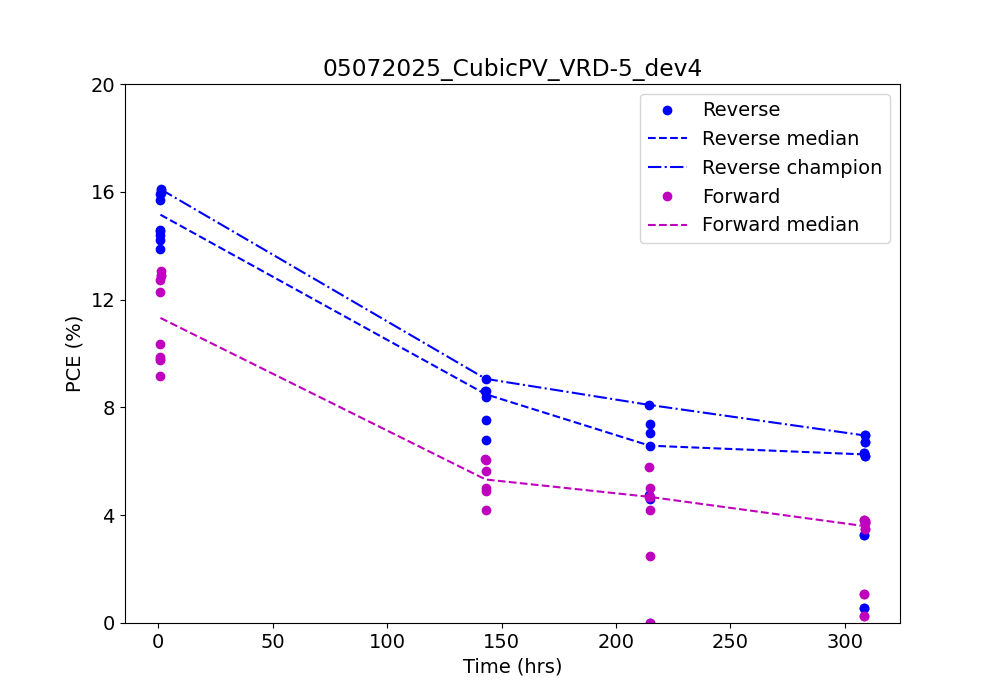

In [36]:
# Make the plot

# Split the data into forward and reverse scan types.
df_sample_fwd = df_sample.loc[df['scan_type'] == 'F']
df_sample_rev = df_sample.loc[df['scan_type'] == 'R']

fig, ax = plt.subplots(figsize=(10, 7))

clump_median = []
clump_median_time = []
clump_champ = []
for clump_index in range(clump_max+1):
    df_clump = df_sample_rev[df_sample_rev['clump_number'] == clump_index]
    xdata = list(df_clump['time_hrs'])
    xdata = [float(x) for x in xdata]
    ydata = list(df_clump['pce'])
    ydata = [float(y) for y in ydata]
    clump_median_time.append(np.median(xdata))
    clump_median.append(np.median(ydata))
    clump_champ.append(np.max(ydata))
   
    plt.plot(xdata, ydata, 'bo')
    #
plt.plot(xdata, ydata, 'bo', label="Reverse")
plt.plot(clump_median_time, clump_median, 'b--', label="Reverse median")
plt.plot(clump_median_time, clump_champ, 'b-.', label="Reverse champion")
# Also plot the  Forward data
clump_median = []
clump_median_time = []
for clump_index in range(clump_max+1):
    df_clump = df_sample_fwd[df_sample_fwd['clump_number'] == clump_index]
    xdata = list(df_clump['time_hrs'])
    ydata = list(df_clump['pce'])
    ydata = [float(y) for y in ydata]
    clump_median_time.append(np.median(xdata))
    clump_median.append(np.median(ydata))
    plt.plot(xdata, ydata, 'mo')
plt.plot(xdata, ydata, 'mo', label="Forward")
plt.plot(clump_median_time, clump_median, 'm--', label="Forward median")

for test_times in start_end_times_list:
    ss = test_times[0]
    ee = test_times[1]
    test_type = test_times[2]
    yrange = np.array([0,100])
    plt.fill_betweenx(yrange, ss, ee, alpha=0.55, label=f"{test_type}")

plt.legend()

plt.title(sample_id)
plt.xlabel("Time (hrs)")
plt.ylabel(parameter_ylabel)
plt.ylim(0,20)
ax.set_yticks([0,4,8,12,16,20])
# plt.grid()

In [37]:




    # #
    # model = lm.Model(Constant) - lm.Model(Stretch_Exp)
    # params = model.make_params()
    # params['constant'].set(ydata[-1],min=0.0001,max=10)
    # params['amp'].set(-ydata[0]+ydata[-1])
    # params['tau'].set(100,min=20,max=9999.9)
    # params['shift'].set(xdata[0])
    # params['beta'].set(1.0,min=0.8,max=1.2)
    # y0 = model.eval(params,x=np.array(xdata))
    # print("xdata=",xdata," \nydata=",ydata," \ny0=",y0)
    # print("----")
    # #

## Box Plot 

In [38]:
import matplotlib.patches as patches # Add this line

In [39]:
# Helper function from Prescreening_analysis.ipynb (cell 11)
# error boxes function
def make_error_boxes(ax, xdata, xerror, yerror_25, yerror_75, facecolor='r', edgecolor='none', alpha=0.5):
    '''Create boxes with the same x-widths and absolute upper and lower edges.'''
    errorboxes = []
    xe = xerror
    for x, ye25, ye75 in zip(xdata, yerror_25, yerror_75):
        rect = patches.Rectangle((x - xe, ye25), 2.0*xe, ye75 - ye25, facecolor=facecolor, edgecolor=edgecolor, alpha=alpha)
        errorboxes.append(rect)
    
    for box in errorboxes:
        ax.add_patch(box)

# Adapted filter_dataframe function
def filter_dataframe_for_boxplot(main_df, time_interval_epoch, sample_id_to_filter, scan_direction_to_filter):
    '''
    Filter a dataframe based on an absolute epoch time interval, a sample id, and a scan direction.
    Assumes 'main_df' has 'abs_epoch_time', 'sample_id', and 'scan_type' columns.
    '''
    # Filter by time interval using the absolute epoch time
    df_filtered = main_df[(main_df['abs_epoch_time'] >= time_interval_epoch[0]) & (main_df['abs_epoch_time'] <= time_interval_epoch[1])]
    
    # Filter by sample ID
    df_filtered = df_filtered[df_filtered['sample_id'] == sample_id_to_filter]
    
    # Filter by scan direction
    if scan_direction_to_filter.upper() in ['F', 'R']:
        df_filtered = df_filtered[df_filtered['scan_type'] == scan_direction_to_filter.upper()]
    elif scan_direction_to_filter.lower() == 'both':
        pass # No filtering by scan direction if 'both'
    else:
        print(f"filter_dataframe_for_boxplot: {scan_direction_to_filter} is an invalid scan_direction. Returning data for both directions if present.")

    # print(f"filter_dataframe_for_boxplot: returning {len(df_filtered)} measurements for sample {sample_id_to_filter}, direction {scan_direction_to_filter}.")
    return df_filtered

# Timestamp conversion functions (from Solar_Simulator_timeseries_report_V1.ipynb cell 14, if not already globally available)
def epoch_to_timestamp(ts):
    '''Convert a unix epoch to a YYYY-MM-DD hh:mm:ss timestamp'''
    return datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

def timestamp_to_epoch(dt):
    '''Convert YYYY-MM-DD hh:mm:ss timestamp string to a unix epoch'''
    datetime_obj = datetime.strptime(dt, "%Y-%m-%d %H:%M:%S")
    return datetime_obj.timestamp()

In [40]:
def my_boxplot_comparison(main_df_with_abs_time, time_interval_epoch, list_of_sample_ids, 
                          parameter_to_plot, scan_direction_to_plot, 
                          plot_title, y_axis_label, y_limits, short_sample_labels=None):
    '''
    Create a customized box plot comparing multiple samples for a specific parameter
    within a given absolute time interval and for a specific scan direction.

    Args:
        main_df_with_abs_time (pd.DataFrame): The main DataFrame containing all JV data. 
                                             Must include 'abs_epoch_time', 'sample_id', 
                                             'scan_type', and the parameter_to_plot.
        time_interval_epoch (list): A list [start_epoch, end_epoch] for filtering data.
        list_of_sample_ids (list): A list of sample_id strings to compare.
        parameter_to_plot (str): The column name of the parameter to plot (e.g., 'pce', 'voc_v').
        scan_direction_to_plot (str): 'F' for Forward, 'R' for Reverse, or 'Both'.
                                       If 'Both', data for both scans will be combined for each sample.
        plot_title (str): The title for the plot.
        y_axis_label (str): The label for the Y-axis.
        y_limits (list): A list [ymin, ymax] for the Y-axis.
        short_sample_labels (list, optional): A list of short labels for x-axis ticks, 
                                             corresponding to list_of_sample_ids. 
                                             If None, full sample_ids are used.
    '''
    
    data_for_boxplot = []
    legend_stats_list = []

    if not short_sample_labels:
        tick_labels_for_plot = list_of_sample_ids
    elif len(short_sample_labels) == len(list_of_sample_ids):
        tick_labels_for_plot = short_sample_labels
    else:
        print("Warning: Mismatch in length of short_sample_labels and list_of_sample_ids. Using full IDs.")
        tick_labels_for_plot = list_of_sample_ids

    for sample_id in list_of_sample_ids:
        df_filtered = filter_dataframe_for_boxplot(main_df_with_abs_time, 
                                                   time_interval_epoch, 
                                                   sample_id, 
                                                   scan_direction_to_plot)
        
        # Ensure the parameter_to_plot column exists and attempt conversion, handling potential errors
        if parameter_to_plot in df_filtered.columns:
            try:
                # Attempt to convert to float, coercing errors to NaN, then drop NaNs
                parameter_data_series = pd.to_numeric(df_filtered[parameter_to_plot], errors='coerce').dropna()
                parameter_data = list(parameter_data_series)
            except Exception as e:
                print(f"Warning: Could not convert column {parameter_to_plot} to numeric for sample {sample_id}. Error: {e}")
                parameter_data = []
        else:
            print(f"Warning: Column {parameter_to_plot} not found for sample {sample_id}.")
            parameter_data = []
            
        data_for_boxplot.append(parameter_data)
        
        if parameter_data: # Check if list is not empty
            stats_str = (f'{sample_id} ({scan_direction_to_plot if scan_direction_to_plot.upper() in ["F","R"] else "Both"}): '
                         f'Avg={np.average(parameter_data):.2f}, '
                         f'Med={np.median(parameter_data):.2f}, '
                         f'N={len(parameter_data)}')
        else:
            stats_str = f'{sample_id} ({scan_direction_to_plot if scan_direction_to_plot.upper() in ["F","R"] else "Both"}): No data'
        legend_stats_list.append(stats_str)

    # Figure and axes
    fig, ax = plt.subplots(1, figsize=(max(8, 2.5 * len(list_of_sample_ids)), 7)) # Adjust figsize
    params = {'legend.fontsize': 'medium',
              'axes.labelsize': 'x-large',
              'axes.titlesize':'x-large',
              'xtick.labelsize':'large',
              'ytick.labelsize':'x-large'}
    plt.rcParams.update(params)
    
    # Creating plot
    if any(data_for_boxplot): # Check if there's any data to plot
        bplot = ax.boxplot(data_for_boxplot, tick_labels=tick_labels_for_plot, patch_artist=True, widths=0.6)

        # Fill with colors

        try:
            colors = plt.colormaps.get_cmap('Pastel1').resampled(len(list_of_sample_ids))
        except AttributeError: # For older matplotlib versions
            colors = plt.cm.get_cmap('Pastel1', len(list_of_sample_ids))
        
        for i, patch in enumerate(bplot['boxes']):
            patch.set_facecolor(colors(i))
        
        # Add individual data points as jittered scatter
        for i, data_points in enumerate(data_for_boxplot):
            if data_points:
                # Generate jitter based on the number of samples to avoid overlap if few samples
                jitter_strength = 0.08 if len(list_of_sample_ids) > 2 else 0.04
                jitter = np.random.normal(0, jitter_strength, size=len(data_points))
                ax.scatter([i + 1 + j for j in jitter], data_points, alpha=0.5, color='black', s=20)
    else:
        ax.text(0.5, 0.5, "No data to display for the selected criteria.", 
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    # Finishing touches
    plt.ylabel(y_axis_label)
    plt.title(plot_title, fontsize=14)
    print("\nSummary Stats (for the selected time interval and scan direction):")
    for stat_line in legend_stats_list:
        print(stat_line)
        
    if y_limits[0] is not None and y_limits[1] is not None:
        plt.ylim(y_limits[0], y_limits[1])
    plt.xticks(rotation=15, ha="right") # Rotate labels if they are long
    plt.grid('on', alpha=0.25, axis='y')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    
    plt.show() 
    
    return fig

Min epoch for selected samples: 1746646576.13 (2025-05-07 12:36:16)

--- Generating Box Plot ---
Selected Samples: 05072025_CubicPV_VRD-5_dev4, 05072025_CubicPV_VRD-5_dev1, 05072025_CubicPV_CCP1-20_dev13, 05072025_CubicPV_CCP1-20_dev12
Parameter: PCE (%) (column: pce)
Scan Direction: R
Time Interval (Epoch Seconds): [1746646576.13, 1746653776.13]  (from 2025-05-07 12:36:16 to 2025-05-07 14:36:16)
Short Labels for X-axis: ['dev4', 'dev1', 'dev13', 'dev12']

--- Debugging data for sample: 05072025_CubicPV_VRD-5_dev4 ---
Raw data for 05072025_CubicPV_VRD-5_dev4 (first 5 rows with relevant columns):
                      sample_id  abs_epoch_time scan_type   pce
49  05072025_CubicPV_VRD-5_dev4    1.747758e+09         R  6.19
50  05072025_CubicPV_VRD-5_dev4    1.747758e+09         F  3.47
51  05072025_CubicPV_VRD-5_dev4    1.747758e+09         R  6.73
52  05072025_CubicPV_VRD-5_dev4    1.747758e+09         F  3.78
53  05072025_CubicPV_VRD-5_dev4    1.747758e+09         R  6.96
Epoch time ra

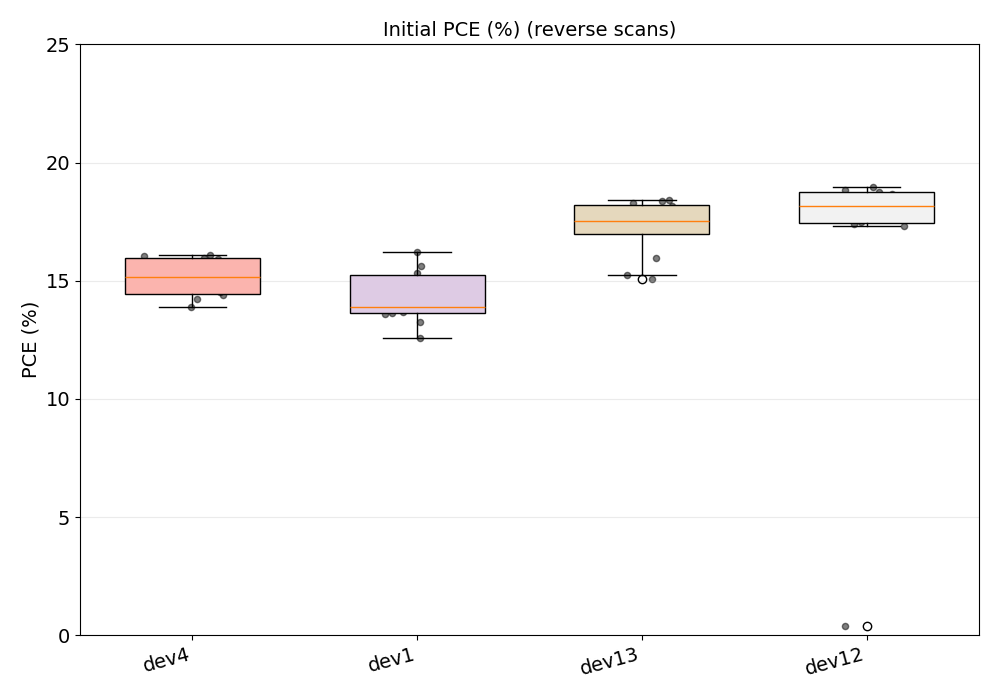

In [41]:
# Add absolute epoch time to the main DataFrame if it doesn't exist
if 'abs_epoch_time' not in jv_test_recent_values.columns:
    jv_test_recent_values['abs_epoch_time'] = jv_test_recent_values['base_time'].astype(float) + 60.0 * jv_test_recent_values['elapsed_time'].astype(float)

# --- Parameters for the box plot ---
# Get selected samples from the form
selected_samples_for_boxplot = form_responses_dictionary['Sample names? (select up to four)']

# Determine the parameter to plot and its label
parameter_ylabel_from_form = form_responses_dictionary['Parameter to plot?']
parameter_to_plot_boxplot = ""
y_axis_label_boxplot = parameter_ylabel_from_form

if parameter_ylabel_from_form == 'PCE (%)':
    parameter_to_plot_boxplot = "pce"
elif parameter_ylabel_from_form == 'FF (%)':
    parameter_to_plot_boxplot = "ff"
elif parameter_ylabel_from_form == 'Voc (V)':
    y_axis_label_boxplot = r'V$_{oc}$ (V)' # Using LaTeX for subscript
    parameter_to_plot_boxplot = "voc_v"
elif parameter_ylabel_from_form == 'Jsc (mA/cm^2)':
    y_axis_label_boxplot = r'J$_{sc}$ (mA/cm$^2$)' # Using LaTeX for subscript
    parameter_to_plot_boxplot = "jsc_ma"
elif parameter_ylabel_from_form == 'MPP (V)':
    parameter_to_plot_boxplot = "mpp_v"
elif parameter_ylabel_from_form == 'Rser (Ohm-cm^2)':
    y_axis_label_boxplot = r'R$_{ser}$ ($\Omega$-cm$^2$)' # Using LaTeX for Omega
    parameter_to_plot_boxplot = "rser"
elif parameter_ylabel_from_form == 'Rsh (Ohm-cm^2)':
    y_axis_label_boxplot = r'R$_{sh}$ ($\Omega$-cm$^2$)' # Using LaTeX for Omega
    parameter_to_plot_boxplot = "rsh"
else:
    print(f"Warning: Invalid parameter ylabel for boxplot: {parameter_ylabel_from_form}. Defaulting to PCE.")
    parameter_to_plot_boxplot = "pce"
    y_axis_label_boxplot = "PCE (%)"

scan_direction_from_form = form_responses_dictionary["Scan direction?"]
scan_direction_for_boxplot_code = ""
if scan_direction_from_form.lower() == "forward":
    scan_direction_for_boxplot_code = "F"
elif scan_direction_from_form.lower() == "reverse":
    scan_direction_for_boxplot_code = "R"
elif scan_direction_from_form.lower() == "both":
    scan_direction_for_boxplot_code = "Both" 
else:
    print(f"Warning: Invalid scan direction: {scan_direction_from_form}. Defaulting to 'Both'.")
    scan_direction_for_boxplot_code = "Both"

# --- Define the time interval for "initial" measurements ---
# This interval will be relative to the earliest data point AMONG THE SELECTED SAMPLES.
# For example, the first 2 hours of measurements for the selected batch.
boxplot_time_interval_epoch = []
initial_period_hours = 2.0 # Duration for "initial" measurements

if selected_samples_for_boxplot:
    df_for_time_ref = jv_test_recent_values[jv_test_recent_values['sample_id'].isin(selected_samples_for_boxplot)]
    if not df_for_time_ref.empty and 'abs_epoch_time' in df_for_time_ref.columns and not df_for_time_ref['abs_epoch_time'].isnull().all():
        min_epoch_for_selected_samples = df_for_time_ref['abs_epoch_time'].min()
        start_epoch_for_boxplot = min_epoch_for_selected_samples
        end_epoch_for_boxplot = min_epoch_for_selected_samples + (initial_period_hours * 3600) 
        boxplot_time_interval_epoch = [start_epoch_for_boxplot, end_epoch_for_boxplot]
        print(f"Min epoch for selected samples: {min_epoch_for_selected_samples} ({epoch_to_timestamp(min_epoch_for_selected_samples)})")
    else:
        print("Warning: Could not determine time interval. Selected samples not found, 'abs_epoch_time' missing, or all 'abs_epoch_time' are NaN.")
else:
    print("Warning: No samples selected for box plot, cannot determine time interval.")

# Define Y-axis limits based on the parameter
if parameter_to_plot_boxplot == "pce":
    y_limits_boxplot = [0, 25]
elif parameter_to_plot_boxplot == "voc_v":
    y_limits_boxplot = [0.5, 1.3] # Adjusted for typical Voc
elif parameter_to_plot_boxplot == "jsc_ma":
    y_limits_boxplot = [0, 30]  # Adjusted for typical Jsc
elif parameter_to_plot_boxplot == "ff":
    y_limits_boxplot = [0, 90]   # Adjusted for typical FF
elif parameter_to_plot_boxplot == "rser":
    y_limits_boxplot = [0, 50] # Adjust as needed
elif parameter_to_plot_boxplot == "rsh":
    y_limits_boxplot = [0, 20000] # Adjust as needed, Rsh can be large
else:
    y_limits_boxplot = [None, None] 

# Optional: Create short labels for samples if names are long
short_labels = [sid.split('_')[-1] if '_' in sid else sid for sid in selected_samples_for_boxplot]


# --- Call the boxplot function ---
if form_responses_dictionary["Plot type?"] == "Box plot" and selected_samples_for_boxplot and parameter_to_plot_boxplot and boxplot_time_interval_epoch:
    print(f"\n--- Generating Box Plot ---")
    print(f"Selected Samples: {', '.join(selected_samples_for_boxplot)}")
    print(f"Parameter: {y_axis_label_boxplot} (column: {parameter_to_plot_boxplot})")
    print(f"Scan Direction: {scan_direction_for_boxplot_code}")
    print(f"Time Interval (Epoch Seconds): {boxplot_time_interval_epoch} "
          f" (from {epoch_to_timestamp(boxplot_time_interval_epoch[0])} to {epoch_to_timestamp(boxplot_time_interval_epoch[1])})")
    print(f"Short Labels for X-axis: {short_labels}")

    # --- Diagnostic: Check data for one sample ---
    if selected_samples_for_boxplot:
        sample_to_debug = selected_samples_for_boxplot[0]
        print(f"\n--- Debugging data for sample: {sample_to_debug} ---")
        df_sample_in_main = jv_test_recent_values[jv_test_recent_values['sample_id'] == sample_to_debug].copy() # Use .copy() to avoid SettingWithCopyWarning
        
        if not df_sample_in_main.empty:
            # Convert relevant columns to numeric, coercing errors
            for col_to_check in ['abs_epoch_time', parameter_to_plot_boxplot]:
                if col_to_check in df_sample_in_main.columns:
                    df_sample_in_main[col_to_check] = pd.to_numeric(df_sample_in_main[col_to_check], errors='coerce')

            print(f"Raw data for {sample_to_debug} (first 5 rows with relevant columns):")
            print(df_sample_in_main[['sample_id', 'abs_epoch_time', 'scan_type', parameter_to_plot_boxplot]].head())
            if 'abs_epoch_time' in df_sample_in_main.columns and not df_sample_in_main['abs_epoch_time'].isnull().all():
                print(f"Epoch time range for {sample_to_debug}: {df_sample_in_main['abs_epoch_time'].min()} to {df_sample_in_main['abs_epoch_time'].max()}")
                print(f"In human readable format: {epoch_to_timestamp(df_sample_in_main['abs_epoch_time'].min())} to {epoch_to_timestamp(df_sample_in_main['abs_epoch_time'].max())}")
            else:
                 print(f"No valid 'abs_epoch_time' data for {sample_to_debug}")
            print(f"Available scan types for {sample_to_debug}: {df_sample_in_main['scan_type'].unique()}")
        else:
            print(f"No data found for {sample_to_debug} in jv_test_recent_values AT ALL.")

        # Test the filter_dataframe_for_boxplot function directly
        df_debug_filtered = filter_dataframe_for_boxplot(
            jv_test_recent_values, # ensure this df has 'abs_epoch_time'
            boxplot_time_interval_epoch,
            sample_to_debug,
            scan_direction_for_boxplot_code
        )
        print(f"\nData for {sample_to_debug} AFTER filtering by filter_dataframe_for_boxplot (for direction '{scan_direction_for_boxplot_code}' and interval):")
        if not df_debug_filtered.empty:
            # Ensure parameter_to_plot_boxplot is numeric before head()
            df_debug_filtered[parameter_to_plot_boxplot] = pd.to_numeric(df_debug_filtered[parameter_to_plot_boxplot], errors='coerce')
            print(df_debug_filtered[['sample_id', 'abs_epoch_time', 'scan_type', parameter_to_plot_boxplot]].head())
            print(f"Number of rows found: {len(df_debug_filtered)}")
        else:
            print("No data returned by filter_dataframe_for_boxplot for this sample and criteria.")
        print(f"--- End Debugging for {sample_to_debug} ---\n")
    # --- End Diagnostic ---

    fig_boxplot = my_boxplot_comparison(
        main_df_with_abs_time=jv_test_recent_values,
        time_interval_epoch=boxplot_time_interval_epoch,
        list_of_sample_ids=selected_samples_for_boxplot,
        parameter_to_plot=parameter_to_plot_boxplot,
        scan_direction_to_plot=scan_direction_for_boxplot_code, # Use the F/R/Both code
        plot_title=f"Initial {form_responses_dictionary['Parameter to plot?']} ({scan_direction_from_form} scans)", # Use original form response for title
        y_axis_label=y_axis_label_boxplot,
        y_limits=y_limits_boxplot,
        short_sample_labels=short_labels
    )
else:
    if form_responses_dictionary["Plot type?"] == "Box plot":
        print("Box plot selected, but no samples chosen, parameter invalid, or time interval could not be determined.")

In [65]:
def my_boxplot_comparison(main_df_with_abs_time, time_interval_epoch, list_of_sample_ids, 
                          parameter_to_plot, scan_direction_to_plot, 
                          plot_title, y_axis_label, y_limits, short_sample_labels=None):
    '''
    Create a customized box plot comparing multiple samples for a specific parameter
    within a given absolute time interval and for a specific scan direction.

    Args:
        main_df_with_abs_time (pd.DataFrame): The main DataFrame containing all JV data. 
                                             Must include 'abs_epoch_time', 'sample_id', 
                                             'scan_type', and the parameter_to_plot.
        time_interval_epoch (list): A list [start_epoch, end_epoch] for filtering data.
        list_of_sample_ids (list): A list of sample_id strings to compare.
        parameter_to_plot (str): The column name of the parameter to plot (e.g., 'pce', 'voc_v').
        scan_direction_to_plot (str): 'F' for Forward, 'R' for Reverse, or 'Both'.
                                       If 'Both', data for both scans will be combined for each sample.
        plot_title (str): The title for the plot.
        y_axis_label (str): The label for the Y-axis.
        y_limits (list): A list [ymin, ymax] for the Y-axis.
        short_sample_labels (list, optional): A list of short labels for x-axis ticks, 
                                             corresponding to list_of_sample_ids. 
                                             If None, full sample_ids are used.
    '''
    
    data_for_boxplot = []
    legend_stats_list = [] # This will store the formatted strings for the legend

    if not short_sample_labels:
        tick_labels_for_plot = list_of_sample_ids
    elif len(short_sample_labels) == len(list_of_sample_ids):
        tick_labels_for_plot = short_sample_labels
    else:
        print("Warning: Mismatch in length of short_sample_labels and list_of_sample_ids. Using full IDs.")
        tick_labels_for_plot = list_of_sample_ids

    for sample_id in list_of_sample_ids:
        df_filtered = filter_dataframe_for_boxplot(main_df_with_abs_time, 
                                                   time_interval_epoch, 
                                                   sample_id, 
                                                   scan_direction_to_plot)
        
        if parameter_to_plot in df_filtered.columns:
            try:
                parameter_data_series = pd.to_numeric(df_filtered[parameter_to_plot], errors='coerce').dropna()
                parameter_data = list(parameter_data_series)
            except Exception as e:
                print(f"Warning: Could not convert column {parameter_to_plot} to numeric for sample {sample_id}. Error: {e}")
                parameter_data = []
        else:
            print(f"Warning: Column {parameter_to_plot} not found for sample {sample_id}.")
            parameter_data = []
            
        data_for_boxplot.append(parameter_data)
        
        # Prepare the statistics string for the legend
        if parameter_data: 
            stats_str = (f'{tick_labels_for_plot[list_of_sample_ids.index(sample_id)]} ' # Use short label if available
                         f'({scan_direction_to_plot if scan_direction_to_plot.upper() in ["F","R"] else "Both"}): '
                         f'Avg={np.average(parameter_data):.2f}, '
                         f'Med={np.median(parameter_data):.2f}, '
                         f'N={len(parameter_data)}')
        else:
            stats_str = f'{tick_labels_for_plot[list_of_sample_ids.index(sample_id)]} ({scan_direction_to_plot if scan_direction_to_plot.upper() in ["F","R"] else "Both"}): No data'
        legend_stats_list.append(stats_str)

    # Figure and axes
    # Adjust figsize dynamically: make it wider if there are more samples
    fig_width = max(8, 2.0 * len(list_of_sample_ids)) # Ensure a minimum width, increase per sample
    fig, ax = plt.subplots(1, figsize=(fig_width, 7))
    
    # Define rcParams for this plot specifically, including legend fontsize
    # Note: 'figure.figsize' is set above. Other params can be added if needed globally before this function.
    # For this function, direct parameter passing to plot elements is often clearer.
    # Example: ax.set_xlabel("X Label", fontsize='x-large')
    # plt.rcParams.update({'axes.labelsize': 'x-large', # Already set by form's rcParams
    #                      'axes.titlesize':'x-large', # Already set by form's rcParams
    #                      'xtick.labelsize':'large',  # Already set by form's rcParams
    #                      'ytick.labelsize':'x-large'})# Already set by form's rcParams
    
    bplot = None # Initialize bplot
    if any(data_for_boxplot): 
        bplot = ax.boxplot(data_for_boxplot, tick_labels=tick_labels_for_plot, patch_artist=True, widths=0.6)

        # Fill with colors and prepare legend items
        try:
            # resample is for matplotlib 3.x+
            colors_cmap = plt.colormaps.get_cmap('Pastel1').resampled(len(list_of_sample_ids))
        except AttributeError: # Fallback for older matplotlib
            colors_cmap = plt.cm.get_cmap('Pastel1', len(list_of_sample_ids))
        
        legend_handles = []
        processed_labels_for_legend = [] # Labels for items that actually have boxes

        box_plot_idx = 0 
        for i in range(len(list_of_sample_ids)):
            if data_for_boxplot[i]: # If data exists for this sample and a box was plotted
                if box_plot_idx < len(bplot['boxes']):
                    patch = bplot['boxes'][box_plot_idx]
                    # Use original sample index 'i' for consistent color mapping
                    patch.set_facecolor(colors_cmap(i % colors_cmap.N)) 
                    legend_handles.append(patch)
                    # Use the pre-formatted string from legend_stats_list
                    processed_labels_for_legend.append(legend_stats_list[i])
                    box_plot_idx += 1
        
        # Add individual data points as jittered scatter
        for i, data_points in enumerate(data_for_boxplot):
            if data_points:
                jitter_strength = 0.08 if len(list_of_sample_ids) > 2 else 0.04
                jitter = np.random.normal(0, jitter_strength, size=len(data_points))
                ax.scatter([i + 1 + j for j in jitter], data_points, alpha=0.5, color='black', s=20)
        
        # Add the legend to the plot using the handles and processed labels
        if legend_handles:
             ax.legend(legend_handles, processed_labels_for_legend, title="Sample Statistics", 
                       loc='best', fontsize='medium') # Matched 'medium' from my_boxplot example

    else: 
        ax.text(0.5, 0.5, "No data to display for the selected criteria.", 
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        # If no plot, print the stats to console as before
        print("\nSummary Stats (for the selected time interval and scan direction):")
        for stat_line in legend_stats_list: # Print all stats, including "No data"
            print(stat_line)

    # Finishing touches
    plt.ylabel(y_axis_label, fontsize=plt.rcParams.get('axes.labelsize', 'x-large'))
    plt.title(plot_title, fontsize=plt.rcParams.get('axes.titlesize', 'x-large'))
        
    if y_limits[0] is not None and y_limits[1] is not None:
        plt.ylim(y_limits[0], y_limits[1])
    
    # Adjust xtick label properties
    plt.xticks(fontsize=plt.rcParams.get('xtick.labelsize', 'large'))
    if len(list_of_sample_ids) > 3 : # Rotate if many samples or labels are long
         plt.xticks(rotation=15, ha="right")

    plt.yticks(fontsize=plt.rcParams.get('ytick.labelsize', 'x-large'))
    plt.grid(True, alpha=0.25, axis='y') # Explicitly enable grid
    plt.tight_layout() 
    
    plt.show() 
    
    return fig


Min epoch for selected samples: 1746646576.13 (2025-05-07 12:36:16)

--- Generating Box Plot ---
Selected Samples: 05072025_CubicPV_VRD-5_dev4, 05072025_CubicPV_VRD-5_dev1, 05072025_CubicPV_CCP1-20_dev13, 05072025_CubicPV_CCP1-20_dev12
Parameter: PCE (%) (column: pce)
Scan Direction: R
Time Interval (Epoch Seconds): [1746646576.13, 1746653776.13]  (from 2025-05-07 12:36:16 to 2025-05-07 14:36:16)
Short Labels for X-axis: ['dev4', 'dev1', 'dev13', 'dev12']

--- Debugging data for sample: 05072025_CubicPV_VRD-5_dev4 ---
Raw data for 05072025_CubicPV_VRD-5_dev4 (first 5 rows with relevant columns):
                      sample_id  abs_epoch_time scan_type   pce
49  05072025_CubicPV_VRD-5_dev4    1.747758e+09         R  6.19
50  05072025_CubicPV_VRD-5_dev4    1.747758e+09         F  3.47
51  05072025_CubicPV_VRD-5_dev4    1.747758e+09         R  6.73
52  05072025_CubicPV_VRD-5_dev4    1.747758e+09         F  3.78
53  05072025_CubicPV_VRD-5_dev4    1.747758e+09         R  6.96
Epoch time ra

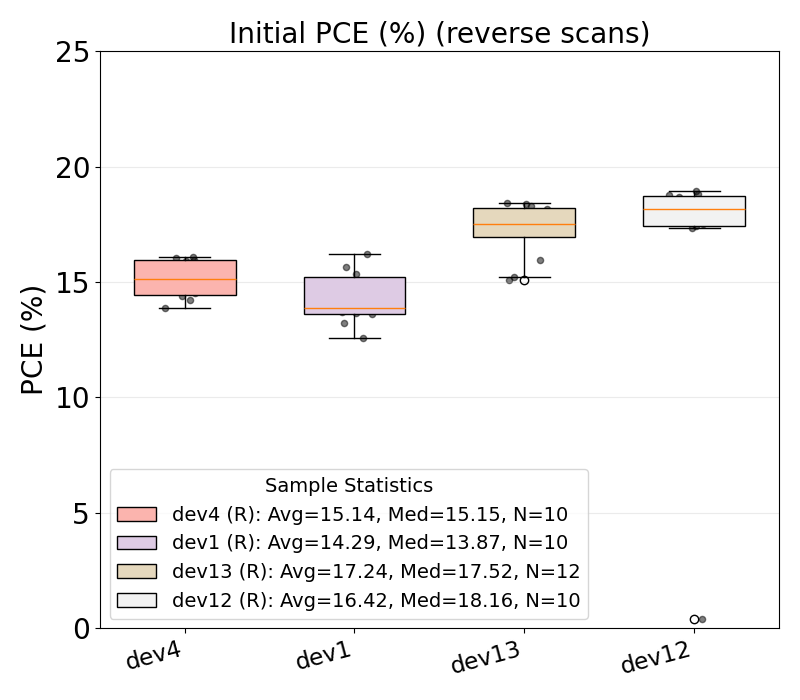

In [66]:
# Add absolute epoch time to the main DataFrame if it doesn't exist
if 'abs_epoch_time' not in jv_test_recent_values.columns:
    jv_test_recent_values['abs_epoch_time'] = jv_test_recent_values['base_time'].astype(float) + 60.0 * jv_test_recent_values['elapsed_time'].astype(float)

# --- Parameters for the box plot ---
# Get selected samples from the form
selected_samples_for_boxplot = form_responses_dictionary['Sample names? (select up to four)']

# Determine the parameter to plot and its label
parameter_ylabel_from_form = form_responses_dictionary['Parameter to plot?']
parameter_to_plot_boxplot = ""
y_axis_label_boxplot = parameter_ylabel_from_form

if parameter_ylabel_from_form == 'PCE (%)':
    parameter_to_plot_boxplot = "pce"
elif parameter_ylabel_from_form == 'FF (%)':
    parameter_to_plot_boxplot = "ff"
elif parameter_ylabel_from_form == 'Voc (V)':
    y_axis_label_boxplot = r'V$_{oc}$ (V)' # Using LaTeX for subscript
    parameter_to_plot_boxplot = "voc_v"
elif parameter_ylabel_from_form == 'Jsc (mA/cm^2)':
    y_axis_label_boxplot = r'J$_{sc}$ (mA/cm$^2$)' # Using LaTeX for subscript
    parameter_to_plot_boxplot = "jsc_ma"
elif parameter_ylabel_from_form == 'MPP (V)':
    parameter_to_plot_boxplot = "mpp_v"
elif parameter_ylabel_from_form == 'Rser (Ohm-cm^2)':
    y_axis_label_boxplot = r'R$_{ser}$ ($\Omega$-cm$^2$)' # Using LaTeX for Omega
    parameter_to_plot_boxplot = "rser"
elif parameter_ylabel_from_form == 'Rsh (Ohm-cm^2)':
    y_axis_label_boxplot = r'R$_{sh}$ ($\Omega$-cm$^2$)' # Using LaTeX for Omega
    parameter_to_plot_boxplot = "rsh"
else:
    print(f"Warning: Invalid parameter ylabel for boxplot: {parameter_ylabel_from_form}. Defaulting to PCE.")
    parameter_to_plot_boxplot = "pce"
    y_axis_label_boxplot = "PCE (%)"

scan_direction_from_form = form_responses_dictionary["Scan direction?"]
scan_direction_for_boxplot_code = ""
if scan_direction_from_form.lower() == "forward":
    scan_direction_for_boxplot_code = "F"
elif scan_direction_from_form.lower() == "reverse":
    scan_direction_for_boxplot_code = "R"
elif scan_direction_from_form.lower() == "both":
    scan_direction_for_boxplot_code = "Both" 
else:
    print(f"Warning: Invalid scan direction: {scan_direction_from_form}. Defaulting to 'Both'.")
    scan_direction_for_boxplot_code = "Both"

# --- Define the time interval for "initial" measurements ---
# This interval will be relative to the earliest data point AMONG THE SELECTED SAMPLES.
# For example, the first 2 hours of measurements for the selected batch.
boxplot_time_interval_epoch = []
initial_period_hours = 2.0 # Duration for "initial" measurements

if selected_samples_for_boxplot:
    df_for_time_ref = jv_test_recent_values[jv_test_recent_values['sample_id'].isin(selected_samples_for_boxplot)]
    if not df_for_time_ref.empty and 'abs_epoch_time' in df_for_time_ref.columns and not df_for_time_ref['abs_epoch_time'].isnull().all():
        min_epoch_for_selected_samples = df_for_time_ref['abs_epoch_time'].min()
        start_epoch_for_boxplot = min_epoch_for_selected_samples
        end_epoch_for_boxplot = min_epoch_for_selected_samples + (initial_period_hours * 3600) 
        boxplot_time_interval_epoch = [start_epoch_for_boxplot, end_epoch_for_boxplot]
        print(f"Min epoch for selected samples: {min_epoch_for_selected_samples} ({epoch_to_timestamp(min_epoch_for_selected_samples)})")
    else:
        print("Warning: Could not determine time interval. Selected samples not found, 'abs_epoch_time' missing, or all 'abs_epoch_time' are NaN.")
else:
    print("Warning: No samples selected for box plot, cannot determine time interval.")

# Define Y-axis limits based on the parameter
if parameter_to_plot_boxplot == "pce":
    y_limits_boxplot = [0, 25]
elif parameter_to_plot_boxplot == "voc_v":
    y_limits_boxplot = [0.5, 1.3] # Adjusted for typical Voc
elif parameter_to_plot_boxplot == "jsc_ma":
    y_limits_boxplot = [0, 30]  # Adjusted for typical Jsc
elif parameter_to_plot_boxplot == "ff":
    y_limits_boxplot = [0, 90]   # Adjusted for typical FF
elif parameter_to_plot_boxplot == "rser":
    y_limits_boxplot = [0, 50] # Adjust as needed
elif parameter_to_plot_boxplot == "rsh":
    y_limits_boxplot = [0, 20000] # Adjust as needed, Rsh can be large
else:
    y_limits_boxplot = [None, None] 

# Optional: Create short labels for samples if names are long
short_labels = [sid.split('_')[-1] if '_' in sid else sid for sid in selected_samples_for_boxplot]


# --- Call the boxplot function ---
if form_responses_dictionary["Plot type?"] == "Box plot" and selected_samples_for_boxplot and parameter_to_plot_boxplot and boxplot_time_interval_epoch:
    print(f"\n--- Generating Box Plot ---")
    print(f"Selected Samples: {', '.join(selected_samples_for_boxplot)}")
    print(f"Parameter: {y_axis_label_boxplot} (column: {parameter_to_plot_boxplot})")
    print(f"Scan Direction: {scan_direction_for_boxplot_code}")
    print(f"Time Interval (Epoch Seconds): {boxplot_time_interval_epoch} "
          f" (from {epoch_to_timestamp(boxplot_time_interval_epoch[0])} to {epoch_to_timestamp(boxplot_time_interval_epoch[1])})")
    print(f"Short Labels for X-axis: {short_labels}")

    # --- Diagnostic: Check data for one sample ---
    if selected_samples_for_boxplot:
        sample_to_debug = selected_samples_for_boxplot[0]
        print(f"\n--- Debugging data for sample: {sample_to_debug} ---")
        df_sample_in_main = jv_test_recent_values[jv_test_recent_values['sample_id'] == sample_to_debug].copy() # Use .copy() to avoid SettingWithCopyWarning
        
        if not df_sample_in_main.empty:
            # Convert relevant columns to numeric, coercing errors
            for col_to_check in ['abs_epoch_time', parameter_to_plot_boxplot]:
                if col_to_check in df_sample_in_main.columns:
                    df_sample_in_main[col_to_check] = pd.to_numeric(df_sample_in_main[col_to_check], errors='coerce')

            print(f"Raw data for {sample_to_debug} (first 5 rows with relevant columns):")
            print(df_sample_in_main[['sample_id', 'abs_epoch_time', 'scan_type', parameter_to_plot_boxplot]].head())
            if 'abs_epoch_time' in df_sample_in_main.columns and not df_sample_in_main['abs_epoch_time'].isnull().all():
                print(f"Epoch time range for {sample_to_debug}: {df_sample_in_main['abs_epoch_time'].min()} to {df_sample_in_main['abs_epoch_time'].max()}")
                print(f"In human readable format: {epoch_to_timestamp(df_sample_in_main['abs_epoch_time'].min())} to {epoch_to_timestamp(df_sample_in_main['abs_epoch_time'].max())}")
            else:
                 print(f"No valid 'abs_epoch_time' data for {sample_to_debug}")
            print(f"Available scan types for {sample_to_debug}: {df_sample_in_main['scan_type'].unique()}")
        else:
            print(f"No data found for {sample_to_debug} in jv_test_recent_values AT ALL.")

        # Test the filter_dataframe_for_boxplot function directly
        df_debug_filtered = filter_dataframe_for_boxplot(
            jv_test_recent_values, # ensure this df has 'abs_epoch_time'
            boxplot_time_interval_epoch,
            sample_to_debug,
            scan_direction_for_boxplot_code
        )
        print(f"\nData for {sample_to_debug} AFTER filtering by filter_dataframe_for_boxplot (for direction '{scan_direction_for_boxplot_code}' and interval):")
        if not df_debug_filtered.empty:
            # Ensure parameter_to_plot_boxplot is numeric before head()
            df_debug_filtered[parameter_to_plot_boxplot] = pd.to_numeric(df_debug_filtered[parameter_to_plot_boxplot], errors='coerce')
            print(df_debug_filtered[['sample_id', 'abs_epoch_time', 'scan_type', parameter_to_plot_boxplot]].head())
            print(f"Number of rows found: {len(df_debug_filtered)}")
        else:
            print("No data returned by filter_dataframe_for_boxplot for this sample and criteria.")
        print(f"--- End Debugging for {sample_to_debug} ---\n")
    # --- End Diagnostic ---

    fig_boxplot = my_boxplot_comparison(
        main_df_with_abs_time=jv_test_recent_values,
        time_interval_epoch=boxplot_time_interval_epoch,
        list_of_sample_ids=selected_samples_for_boxplot,
        parameter_to_plot=parameter_to_plot_boxplot,
        scan_direction_to_plot=scan_direction_for_boxplot_code, # Use the F/R/Both code
        plot_title=f"Initial {form_responses_dictionary['Parameter to plot?']} ({scan_direction_from_form} scans)", # Use original form response for title
        y_axis_label=y_axis_label_boxplot,
        y_limits=y_limits_boxplot,
        short_sample_labels=short_labels
    )
else:
    if form_responses_dictionary["Plot type?"] == "Box plot":
        print("Box plot selected, but no samples chosen, parameter invalid, or time interval could not be determined.")

In [47]:
# Check if dir_path_local and operator are defined, provide defaults if not
if 'dir_path_local' not in globals():
    dir_path_local = os.path.normpath(os.path.join(jupyter_notebook_path, "../Reports/DefaultUser"))
if 'operator' not in globals(): # operator might be set by the first form
    operator_default_for_this_form = "DefaultUser" # Default if first form not run
else:
    operator_default_for_this_form = operator # Use operator from first form if available
    
if 'questions_file_main' not in globals():
    print("Error: 'questions_file_main' (path to your main_questions.json) is not defined. Please run cell [51] or define it.")
    # As a fallback, trying to define it, assuming standard location:
    # questions_file_main = os.path.join(jupyter_notebook_path, "main_questions.json")

# Instantiate the form using main_questions.json
# The 'Sample names? (select up to four)' checkbox will be populated by sample_id_list
# Make sure sample_id_list is defined before this cell is run
if 'sample_id_list' not in globals():
    print("Error: sample_id_list is not defined. Please define it in a previous cell (e.g., cell [48]).")
    sample_id_list = [] # Provide an empty list to avoid further errors if not defined

main_form_for_deg_boxplots = parameters_form(
    persistent=True, 
    dir_path_local=dir_path_local, 
    questions_file_main=questions_file_main, # Path to your existing main_questions.json
    checkbox_values=sample_id_list # This populates the "Sample names" checkbox
)

print("Please select samples and parameters for degradation test box plot comparison:")
print("The script will then find relevant degradation tests for the selected samples.")
print("After submitting the form, run the next cell to generate the plots.")
main_form_for_deg_boxplots.display_question_canvas()

# The 'main_form_for_deg_boxplots' object will be used by the next cell to get responses.




Please select samples and parameters for degradation test box plot comparison:
The script will then find relevant degradation tests for the selected samples.
After submitting the form, run the next cell to generate the plots.


Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

Button(button_style='success', description='Submit', style=ButtonStyle())

In [58]:
print(main_form_for_deg_boxplots.responses)


['Seid', [False, False, True, True, True, True, False], 'MPP (V)', 'reverse', 'Box plot']



--- Processing Form Responses for Box Plots (using jv_test_recent_values) ---
Operator: Seid
Selected Samples in Form: ['05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1', '05072025_CubicPV_CCP1-20_dev13', '05072025_CubicPV_CCP1-20_dev12']
Plot Type Selected: Box plot

Generating a box plot for the initial 2-hour period of the selected samples.



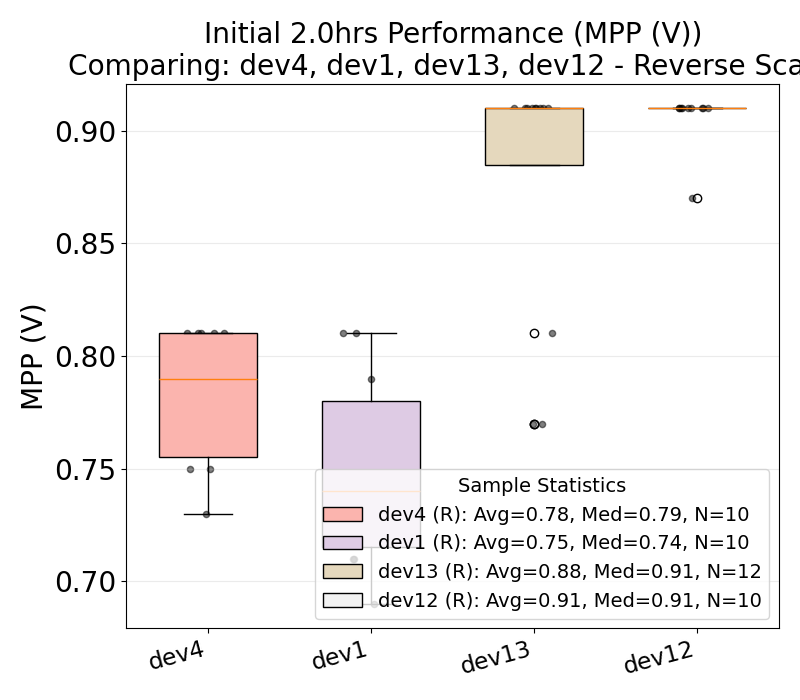

In [59]:




# --- 2. Process Form Responses and Generate Plots ---

if 'main_form_for_deg_boxplots' not in globals() or not hasattr(main_form_for_deg_boxplots, 'responses'):
    print("Error: The form object 'main_form_for_deg_boxplots' is not defined or has no responses. Please run the previous cell to display and submit the form first.")
elif main_form_for_deg_boxplots.responses:
    print("\n--- Processing Form Responses for Box Plots (using jv_test_recent_values) ---")
    
    form_questions_deg_main = [q['question'] for q in main_form_for_deg_boxplots.questions]
    raw_responses_deg_main = list(main_form_for_deg_boxplots.responses)

    if 'sample_id_list' not in globals():
        print("Error: sample_id_list is not defined. Cannot map form responses to sample IDs.")
        selected_samples_from_form = []
    else:
        selected_samples_indices_bool = raw_responses_deg_main[form_questions_deg_main.index("Sample names? (select up to four)")]
        selected_samples_from_form = [s_id for i, s_id in enumerate(sample_id_list) if selected_samples_indices_bool[i]]

    responses_dict_deg_main = {
        "Operator": raw_responses_deg_main[form_questions_deg_main.index("Operator")],
        "Selected Samples": selected_samples_from_form,
        "Parameter to plot?": raw_responses_deg_main[form_questions_deg_main.index("Parameter to plot?")],
        "Scan direction?": raw_responses_deg_main[form_questions_deg_main.index("Scan direction?")],
        "Plot type?": raw_responses_deg_main[form_questions_deg_main.index("Plot type?")]
    }

    print(f"Operator: {responses_dict_deg_main['Operator']}")
    print(f"Selected Samples in Form: {responses_dict_deg_main['Selected Samples']}")
    print(f"Plot Type Selected: {responses_dict_deg_main['Plot type?']}")

    if responses_dict_deg_main['Plot type?'] == "Box plot":
        if not responses_dict_deg_main['Selected Samples']:
            print("No samples selected in the form. Cannot generate box plots.")
        else:
            # --- Prepare jv_test_recent_values and plotting parameters ---
            plot_generation_possible = True
            if 'jv_test_recent_values' not in globals():
                print("Error: jv_test_recent_values DataFrame is not defined.")
                plot_generation_possible = False
            else:
                # Ensure 'abs_epoch_time' column exists and is numeric
                _jv_test_df_copy = jv_test_recent_values.copy()
                if 'abs_epoch_time' not in _jv_test_df_copy.columns:
                    if 'base_time' in _jv_test_df_copy.columns and 'elapsed_time' in _jv_test_df_copy.columns:
                        _jv_test_df_copy['abs_epoch_time'] = _jv_test_df_copy['base_time'].astype(float) + 60.0 * _jv_test_df_copy['elapsed_time'].astype(float)
                    else:
                        print("Error: Cannot create 'abs_epoch_time' as 'base_time' or 'elapsed_time' is missing.")
                        plot_generation_possible = False
                
                if plot_generation_possible and 'abs_epoch_time' in _jv_test_df_copy.columns:
                     _jv_test_df_copy['abs_epoch_time'] = pd.to_numeric(_jv_test_df_copy['abs_epoch_time'], errors='coerce')
                     if _jv_test_df_copy['abs_epoch_time'].isnull().all():
                        print("Error: 'abs_epoch_time' column contains all NaNs or could not be fully converted.")
                        plot_generation_possible = False
                elif plot_generation_possible: 
                    print("Error: 'abs_epoch_time' column could not be created or verified.")
                    plot_generation_possible = False
                
                if plot_generation_possible:
                    current_jv_data_for_plotting = _jv_test_df_copy
                else:
                    current_jv_data_for_plotting = pd.DataFrame() 

            if not plot_generation_possible:
                print("Cannot proceed with box plot generation due to data issues.")
            else:
                parameter_ylabel_form_deg = responses_dict_deg_main['Parameter to plot?']
                parameter_to_plot_code_deg = ""
                y_axis_label_plot_deg = parameter_ylabel_form_deg
                
                if parameter_ylabel_form_deg == 'PCE (%)': parameter_to_plot_code_deg = "pce"
                elif parameter_ylabel_form_deg == 'FF (%)': parameter_to_plot_code_deg = "ff"
                elif parameter_ylabel_form_deg == 'Voc (V)': y_axis_label_plot_deg = r'V$_{oc}$ (V)'; parameter_to_plot_code_deg = "voc_v"
                elif parameter_ylabel_form_deg == 'Jsc (mA/cm^2)': y_axis_label_plot_deg = r'J$_{sc}$ (mA/cm$^2$)'; parameter_to_plot_code_deg = "jsc_ma"
                elif parameter_ylabel_form_deg == 'MPP (V)': parameter_to_plot_code_deg = "mpp_v"
                elif parameter_ylabel_form_deg == 'Rser (Ohm-cm^2)': y_axis_label_plot_deg = r'R$_{ser}$ ($\Omega$-cm$^2$)'; parameter_to_plot_code_deg = "rser"
                elif parameter_ylabel_form_deg == 'Rsh (Ohm-cm^2)': y_axis_label_plot_deg = r'R$_{sh}$ ($\\Omega$-cm$^2$)'; parameter_to_plot_code_deg = "rsh"
                else: parameter_to_plot_code_deg = "pce"; y_axis_label_plot_deg = "PCE (%)"

                scan_direction_form_deg = responses_dict_deg_main["Scan direction?"]
                scan_direction_code_deg = "Both" 
                if scan_direction_form_deg.lower() == "forward": scan_direction_code_deg = "F"
                elif scan_direction_form_deg.lower() == "reverse": scan_direction_code_deg = "R"

                y_limits_deg = [None, None] 
                if parameter_to_plot_code_deg == "pce": y_limits_deg = [0, 25]
                elif parameter_to_plot_code_deg == "voc_v": y_limits_deg = [0.5, 1.3]
                elif parameter_to_plot_code_deg == "jsc_ma": y_limits_deg = [0, 30]
                elif parameter_to_plot_code_deg == "ff": y_limits_deg = [0, 90]
                elif parameter_to_plot_code_deg == "rser": y_limits_deg = [0, 50]
                elif parameter_to_plot_code_deg == "rsh": y_limits_deg = [0, 20000]
                else: y_limits_deg = [None, None]

                # --- Generate box plot for the initial 2-hour period of the selected samples ---
                print("\nGenerating a box plot for the initial 2-hour period of the selected samples.\n")

                df_for_time_ref_initial = current_jv_data_for_plotting[current_jv_data_for_plotting['sample_id'].isin(responses_dict_deg_main['Selected Samples'])]
                initial_period_hours = 2.0

                if df_for_time_ref_initial.empty or df_for_time_ref_initial['abs_epoch_time'].isnull().all():
                    print("Warning: Could not determine time interval for the box plot (no valid data for selected samples).")
                else:
                    min_epoch_initial = df_for_time_ref_initial['abs_epoch_time'].min()
                    start_epoch_initial = min_epoch_initial
                    end_epoch_initial = min_epoch_initial + (initial_period_hours * 3600)
                    initial_time_interval_epoch = [start_epoch_initial, end_epoch_initial]

                    short_labels_initial = [s.split('_')[-1] if '_' in s else s for s in responses_dict_deg_main['Selected Samples']]
                    plot_title_initial = (f"Initial {initial_period_hours}hrs Performance ({parameter_ylabel_form_deg})\n"
                                           f"Comparing: {', '.join(short_labels_initial)} - {scan_direction_form_deg.capitalize()} Scans")

                    fig_initial_boxplot = my_boxplot_comparison(
                        main_df_with_abs_time=current_jv_data_for_plotting.copy(),
                        time_interval_epoch=initial_time_interval_epoch,
                        list_of_sample_ids=responses_dict_deg_main['Selected Samples'],
                        parameter_to_plot=parameter_to_plot_code_deg,
                        scan_direction_to_plot=scan_direction_code_deg,
                        plot_title=plot_title_initial,
                        y_axis_label=y_axis_label_plot_deg,
                        y_limits=y_limits_deg,
                        short_sample_labels=short_labels_initial
                    )
    else:
        print("Plot type was not 'Box plot'. No box plots will be generated from this form submission.")
else:
    print("No responses found in the form. Please submit the form in the previous cell first.")



## Manual Box Plot

In [100]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
# textwrap is not strictly needed for this simpler version, but keep if other parts of notebook use it.
# import textwrap 

# Assuming filter_dataframe_for_boxplot, epoch_to_timestamp, timestamp_to_epoch are defined elsewhere

def my_boxplot_comparison1(main_df_with_abs_time, time_interval_epoch, list_of_sample_ids, 
                          parameter_to_plot, scan_direction_to_plot, 
                          plot_title, y_axis_label, y_limits, 
                          short_sample_labels=None, box_colors=None): # Added box_colors parameter
    '''
    Create a customized box plot comparing multiple samples for a specific parameter
    within a given absolute time interval and for a specific scan direction.
    Allows custom box colors and uses plot_title for the legend.
    '''
    
    data_for_boxplot = []
    legend_stats_list = []

    if not short_sample_labels:
        tick_labels_for_plot = list_of_sample_ids
    elif len(short_sample_labels) == len(list_of_sample_ids):
        tick_labels_for_plot = short_sample_labels
    else:
        print("Warning: Mismatch in length of short_sample_labels and list_of_sample_ids. Using full IDs.")
        tick_labels_for_plot = list_of_sample_ids

    for idx, sample_id in enumerate(list_of_sample_ids):
        df_filtered = filter_dataframe_for_boxplot(main_df_with_abs_time, 
                                                   time_interval_epoch, 
                                                   sample_id, 
                                                   scan_direction_to_plot)
        
        parameter_data = []
        if parameter_to_plot in df_filtered.columns:
            try:
                parameter_data_series = pd.to_numeric(df_filtered[parameter_to_plot], errors='coerce').dropna()
                parameter_data = list(parameter_data_series)
            except Exception as e:
                print(f"Warning: Could not convert column {parameter_to_plot} to numeric for sample {sample_id}. Error: {e}")
        else:
            print(f"Warning: Column {parameter_to_plot} not found for sample {sample_id}.")
            
        data_for_boxplot.append(parameter_data)
        
        current_tick_label_for_legend = tick_labels_for_plot[idx] 
        scan_dir_label = scan_direction_to_plot if scan_direction_to_plot.upper() in ["F","R"] else "Both"

        if parameter_data: 
            stats_str = (f'{current_tick_label_for_legend} ({scan_dir_label}): '
                         f'Avg={np.average(parameter_data):.2f}, '
                         f'Med={np.median(parameter_data):.2f}, '
                         f'N={len(parameter_data)}')
        else:
            stats_str = f'{current_tick_label_for_legend} ({scan_dir_label}): No data'
        legend_stats_list.append(stats_str)

    # Figure and axes
    num_samples = len(list_of_sample_ids)
    fig_width = max(8, 2.0 * num_samples) 
    fig, ax = plt.subplots(1, figsize=(fig_width, 7))
    
    # Apply general rcParams
    params = {'legend.fontsize': 'medium',
              'axes.labelsize': 'x-large',
              'axes.titlesize':'x-large',
              'xtick.labelsize':'large',
              'ytick.labelsize':'x-large'}
    plt.rcParams.update(params)
        
    bplot = None 
    if any(data_for_boxplot): 
        bplot = ax.boxplot(data_for_boxplot, tick_labels=tick_labels_for_plot, patch_artist=True, widths=0.6)

        # Determine colors for boxes
        colors_to_use = []
        if box_colors and len(box_colors) == num_samples:
            colors_to_use = box_colors
            print(f"Using provided custom colors: {colors_to_use}")
        else:
            if box_colors: # Provided but wrong number
                 print(f"Warning: 'box_colors' provided but length ({len(box_colors)}) does not match number of samples ({num_samples}). Defaulting to 'Pastel1' colormap.")
            try:
                colors_cmap = plt.colormaps.get_cmap('Pastel1').resampled(num_samples)
                colors_to_use = [colors_cmap(i % colors_cmap.N) for i in range(num_samples)]
            except AttributeError: 
                colors_cmap = plt.cm.get_cmap('Pastel1', num_samples)
                colors_to_use = [colors_cmap(i % colors_cmap.N) for i in range(num_samples)]
        
        legend_handles = []
        processed_labels_for_legend = [] 

        box_plot_idx = 0 
        for i in range(num_samples):
            if data_for_boxplot[i]: 
                if bplot and box_plot_idx < len(bplot['boxes']):
                    patch = bplot['boxes'][box_plot_idx]
                    patch.set_facecolor(colors_to_use[i]) # Use determined color
                    legend_handles.append(patch)
                    processed_labels_for_legend.append(legend_stats_list[i])
                    box_plot_idx += 1
        
        for i, data_points in enumerate(data_for_boxplot):
            if data_points:
                jitter_strength = 0.08 if num_samples > 2 else 0.04
                jitter = np.random.normal(0, jitter_strength, size=len(data_points))
                ax.scatter([i + 1 + j for j in jitter], data_points, alpha=0.5, color='black', s=20)
        
        if legend_handles:
             # Use plot_title for the legend's title
             ax.legend(legend_handles, processed_labels_for_legend, title=plot_title, 
                       loc='best', 
                       fontsize='medium')
    else: 
        ax.text(0.5, 0.5, "No data to display for the selected criteria.", 
                horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        print("\nSummary Stats (for the selected time interval and scan direction):")
        for stat_line in legend_stats_list: 
            print(stat_line)

    # Finishing touches
    plt.ylabel(y_axis_label) 
    # Set the main plot title using the plot_title parameter. 
    # If the legend also uses it, this might be redundant or you might want a different main title.
    # For now, the main title will also be plot_title.
    fig.suptitle(plot_title, fontsize=plt.rcParams.get('axes.titlesize', 'x-large')) # Use fig.suptitle for overall title
    # ax.set_title("") # Clear individual subplot title if suptitle is used and legend has title

    if y_limits[0] is not None and y_limits[1] is not None:
        plt.ylim(y_limits[0], y_limits[1])
    
    if num_samples > 4 or any(len(str(label)) > 15 for label in tick_labels_for_plot):
         plt.xticks(rotation=30, ha="right")
    else:
         plt.xticks(rotation=0, ha="center")

    plt.yticks() 
    plt.grid(True, alpha=0.25, axis='y') 
    
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make space for suptitle if legend is also on top
    
    plt.show() 
    
    return fig


In [101]:
# Ensure necessary helper functions and variables are available from previous cells:
# jv_test_recent_values (should have 'abs_epoch_time' column created or creatable)
# timestamp_to_epoch, epoch_to_timestamp (from cell [55] or similar)
# my_boxplot_comparison (from cell [87] - ensure it's the updated version with legends, custom colors, and plot_title for legend)
# np, pd, plt, patches, datetime, os should be imported

# --- 1. Manually Define Your Plot Parameters Below ---

# === Example 1: Using default colors (as you provided) ===


list_of_sample_ids_manual = ['05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1'] 


parameter_to_plot_manual_code = "pce" 


y_axis_label_manual = "PCE (%)"


scan_direction_manual_code = "R" 

plot_title_manual = "Manual Plot: dev4 vs dev1 PCE (Reverse, Specified Time)" # This will also be the legend title

y_limits_manual = [0, 25] 

start_time_str_manual = "2025-05-07 12:30:00" 
end_time_str_manual = "2025-05-07 14:30:00"   

short_labels_manual = ['dev4', 'dev1'] # Provide short labels for clarity

#box_colors_manual = None # Set to None or remove line to use default 'Pastel1' colormap

# === Example 2: Defining custom colors and a different scenario ===
# To use this example, comment out Example 1 above and uncomment the lines below.


# scan_direction_manual_code = "Both" 
# plot_title_manual = "Module Voc Comparison (Both Scans, Custom Colors)" # This will be legend title
# y_limits_manual = [0.8, 1.2]  
# start_time_str_manual = "2025-05-07 13:00:00" 
# end_time_str_manual = "2025-05-07 16:00:00"   
# short_labels_manual = ['M1', 'M2', 'M4'] 
box_colors_manual = ['pink', 'lightblue', 'lightgreen'] # Example with color names


# --- End of Manual Parameter Definition ---


Attempting to generate box plot with the following manual parameters:
  Samples: ['05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1']
  Parameter: pce (Label: PCE (%))
  Scan Direction: R
  Title: Manual Plot: dev4 vs dev1 PCE (Reverse, Specified Time)
  Y-Limits: [0, 25]
  Time Interval (Epoch): [1746646200.0, 1746653400.0]
    (Corresponds to: 2025-05-07 12:30:00 to 2025-05-07 14:30:00)
  Short Labels: ['dev4', 'dev1']


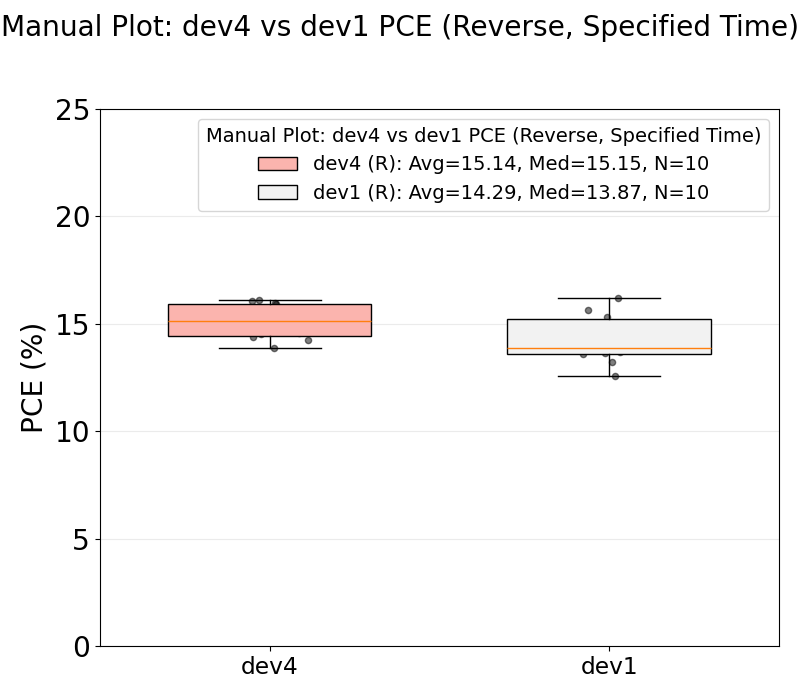

In [102]:

# --- 2. Prepare Data and Generate Plot ---
plot_manual_possible = True
time_interval_manual_epoch = []

# Convert timestamps to epoch seconds
try:
    if 'timestamp_to_epoch' not in globals():
        raise NameError("timestamp_to_epoch function is not defined.")
    time_interval_manual_epoch = [timestamp_to_epoch(start_time_str_manual), timestamp_to_epoch(end_time_str_manual)]
    if time_interval_manual_epoch[1] < time_interval_manual_epoch[0]:
        print("Warning: Manual End Time is before Start Time. Please correct.")
        plot_manual_possible = False
except NameError as e:
    print(f"Error: {e}. Ensure helper functions like timestamp_to_epoch are defined.")
    plot_manual_possible = False
except ValueError as e:
    print(f"Error converting manual timestamps: {e}. Please check format (YYYY-MM-DD HH:MM:SS).")
    plot_manual_possible = False

# Check for jv_test_recent_values and 'abs_epoch_time'
if 'jv_test_recent_values' not in globals():
    print("Error: jv_test_recent_values DataFrame is not defined.")
    plot_manual_possible = False
else:
    _jv_test_df_manual_copy = jv_test_recent_values.copy()
    if 'abs_epoch_time' not in _jv_test_df_manual_copy.columns:
        if 'base_time' in _jv_test_df_manual_copy.columns and 'elapsed_time' in _jv_test_df_manual_copy.columns:
            _jv_test_df_manual_copy['abs_epoch_time'] = _jv_test_df_manual_copy['base_time'].astype(float) + 60.0 * _jv_test_df_manual_copy['elapsed_time'].astype(float)
        else:
            print("Error: Cannot create 'abs_epoch_time' as 'base_time' or 'elapsed_time' is missing from jv_test_recent_values.")
            plot_manual_possible = False
    
    if plot_manual_possible and 'abs_epoch_time' in _jv_test_df_manual_copy.columns:
         _jv_test_df_manual_copy['abs_epoch_time'] = pd.to_numeric(_jv_test_df_manual_copy['abs_epoch_time'], errors='coerce')
         if _jv_test_df_manual_copy['abs_epoch_time'].isnull().all():
            print("Error: 'abs_epoch_time' column contains all NaNs after conversion.")
            plot_manual_possible = False
    elif plot_manual_possible: 
        print("Error: 'abs_epoch_time' column could not be created or verified.")
        plot_manual_possible = False
    
    if plot_manual_possible:
        current_jv_data_for_manual_plotting = _jv_test_df_manual_copy
    else:
        current_jv_data_for_manual_plotting = pd.DataFrame()

# Final checks before plotting
if not list_of_sample_ids_manual: 
    print("Error: list_of_sample_ids_manual is empty.")
    plot_manual_possible = False
if not parameter_to_plot_manual_code: 
    print("Error: parameter_to_plot_manual_code is not defined.")
    plot_manual_possible = False
if not time_interval_manual_epoch and plot_manual_possible: # Check again if it became empty due to timestamp error
    print("Error: time_interval_manual_epoch is not defined or is empty.")
    plot_manual_possible = False


if plot_manual_possible:
    print(f"\nAttempting to generate box plot with the following manual parameters:")
    print(f"  Samples: {list_of_sample_ids_manual}")
    print(f"  Parameter: {parameter_to_plot_manual_code} (Label: {y_axis_label_manual})")
    print(f"  Scan Direction: {scan_direction_manual_code}")
    print(f"  Title: {plot_title_manual}")
    print(f"  Y-Limits: {y_limits_manual}")
    print(f"  Time Interval (Epoch): {time_interval_manual_epoch}")
    if time_interval_manual_epoch:
         print(f"    (Corresponds to: {epoch_to_timestamp(time_interval_manual_epoch[0])} to {epoch_to_timestamp(time_interval_manual_epoch[1])})")
    if short_labels_manual:
        print(f"  Short Labels: {short_labels_manual}")


    fig_manual_boxplot = my_boxplot_comparison1(
        main_df_with_abs_time=current_jv_data_for_manual_plotting.copy(),
        time_interval_epoch=time_interval_manual_epoch,
        list_of_sample_ids=list_of_sample_ids_manual,
        parameter_to_plot=parameter_to_plot_manual_code,
        scan_direction_to_plot=scan_direction_manual_code,
        plot_title=plot_title_manual,
        y_axis_label=y_axis_label_manual,
        y_limits=y_limits_manual,
        short_sample_labels=short_labels_manual
    )
else:
    print("\nManual box plot could not be generated due to missing parameters or data issues. Please check the definitions at the top of this cell.")


In [111]:
# Ensure necessary helper functions and variables are available from previous cells:
# jv_test_recent_values (should have 'abs_epoch_time' column created or creatable)
# timestamp_to_epoch, epoch_to_timestamp (from cell [55] or similar)
# my_boxplot_comparison (from cell [87] - ensure it's the updated version with legends, custom colors, and plot_title for legend)
# np, pd, plt, patches, datetime, os should be imported

print("\n--- Manual Box Plot Generation ---")

# --- 1. Manually Define Your Plot Parameters Below ---

# === Example 1: Using default colors (Currently Commented Out) ===
# print("Using Example 1 parameters (default colors)")
# === Define your parameters for the box plot ===
list_of_sample_ids_manual = ['05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1']  # List of sample ID strings to include in the plot.
parameter_to_plot_manual_code = "voc_v"  # Short code for the parameter to plot (e.g., "pce", "ff", "voc_v", "jsc_ma", "mpp_v", "rser", "rsh").
y_axis_label_manual = r'V$_{oc}$ (V)'  # Label for the Y-axis (can use LaTeX for formatting, e.g., r'V$_{oc}$ (V)').
scan_direction_manual_code = "Both"  # Scan direction: "F" (Forward), "R" (Reverse), or "Both".
plot_title_manual = "Module Voc Comparison (Both Scans, Custom Colors)" # Custom title for the plot; this will also be the legend title.
y_limits_manual = [0.8, 1.2]  # Y-axis limits as a list [min_y, max_y]; use [None, None] for automatic scaling.
start_time_str_manual = "2025-05-07 13:00:00"  # Start time for data selection, format "YYYY-MM-DD HH:MM:SS".
end_time_str_manual = "2025-05-07 16:00:00"    # End time for data selection, format "YYYY-MM-DD HH:MM:SS".
short_labels_manual = ['dev4', 'dev1']  # Optional: List of short labels for x-axis ticks, matching list_of_sample_ids_manual. Use None for full IDs.
box_colors_manual = ['pink', 'lightblue'] # Optional: List of colors (names or hex codes) for boxes, matching list_of_sample_ids_manual. Use None for default.
# Example hex colors: # box_colors_manual = ['#FFC0CB', '#ADD8E6', '#90EE90'] 


# --- End of Manual Parameter Definition ---




--- Manual Box Plot Generation ---



Attempting to generate box plot with the following manual parameters:
  Samples: ['05072025_CubicPV_VRD-5_dev4', '05072025_CubicPV_VRD-5_dev1']
  Parameter: voc_v (Label: V$_{oc}$ (V))
  Scan Direction: Both
  Title: Module Voc Comparison (Both Scans, Custom Colors)
  Y-Limits: [0.8, 1.2]
  Time Interval (Epoch): [1746648000.0, 1746658800.0]
    (Corresponds to: 2025-05-07 13:00:00 to 2025-05-07 16:00:00)
  Short Labels: ['dev4', 'dev1']
  Box Colors: ['pink', 'lightblue']
Using provided custom colors: ['pink', 'lightblue']


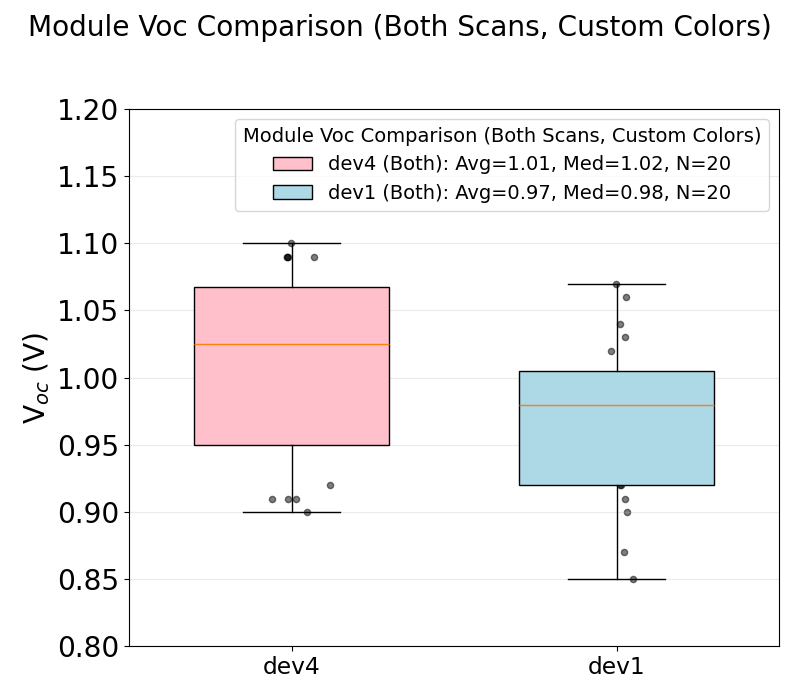

In [112]:

# --- 2. Prepare Data and Generate Plot ---
# The rest of this cell (plotting logic) remains the same as the version I provided 
# in the previous turn (ID: Solar_Simulator_timeseriesTakaji_ipynb_plot_degradation_selections,
# after fixing the 'return' outside function error). 
# That logic already handles the 'box_colors_manual' and uses 'plot_title_manual' 
# for the legend title when calling my_boxplot_comparison.

plot_manual_possible = True
time_interval_manual_epoch = []

# Convert timestamps to epoch seconds
try:
    if 'timestamp_to_epoch' not in globals():
        raise NameError("timestamp_to_epoch function is not defined.")
    time_interval_manual_epoch = [timestamp_to_epoch(start_time_str_manual), timestamp_to_epoch(end_time_str_manual)]
    if time_interval_manual_epoch[1] < time_interval_manual_epoch[0]:
        print("Warning: Manual End Time is before Start Time. Please correct.")
        plot_manual_possible = False
except NameError as e:
    print(f"Error: {e}. Ensure helper functions like timestamp_to_epoch are defined.")
    plot_manual_possible = False
except ValueError as e:
    print(f"Error converting manual timestamps: {e}. Please check format (YYYY-MM-DD HH:MM:SS).")
    plot_manual_possible = False

# Check for jv_test_recent_values and 'abs_epoch_time'
if 'jv_test_recent_values' not in globals():
    print("Error: jv_test_recent_values DataFrame is not defined.")
    plot_manual_possible = False
else:
    _jv_test_df_manual_copy = jv_test_recent_values.copy()
    if 'abs_epoch_time' not in _jv_test_df_manual_copy.columns:
        if 'base_time' in _jv_test_df_manual_copy.columns and 'elapsed_time' in _jv_test_df_manual_copy.columns:
            _jv_test_df_manual_copy['abs_epoch_time'] = _jv_test_df_manual_copy['base_time'].astype(float) + 60.0 * _jv_test_df_manual_copy['elapsed_time'].astype(float)
        else:
            print("Error: Cannot create 'abs_epoch_time' as 'base_time' or 'elapsed_time' is missing from jv_test_recent_values.")
            plot_manual_possible = False
    
    if plot_manual_possible and 'abs_epoch_time' in _jv_test_df_manual_copy.columns:
         _jv_test_df_manual_copy['abs_epoch_time'] = pd.to_numeric(_jv_test_df_manual_copy['abs_epoch_time'], errors='coerce')
         if _jv_test_df_manual_copy['abs_epoch_time'].isnull().all():
            print("Error: 'abs_epoch_time' column contains all NaNs after conversion.")
            plot_manual_possible = False
    elif plot_manual_possible: 
        print("Error: 'abs_epoch_time' column could not be created or verified.")
        plot_manual_possible = False
    
    if plot_manual_possible:
        current_jv_data_for_manual_plotting = _jv_test_df_manual_copy
    else:
        current_jv_data_for_manual_plotting = pd.DataFrame()

# Final checks before plotting
if not list_of_sample_ids_manual: 
    print("Error: list_of_sample_ids_manual is empty.")
    plot_manual_possible = False
if not parameter_to_plot_manual_code: 
    print("Error: parameter_to_plot_manual_code is not defined.")
    plot_manual_possible = False
if not time_interval_manual_epoch and plot_manual_possible: 
    print("Error: time_interval_manual_epoch is not defined or is empty.")
    plot_manual_possible = False


if plot_manual_possible:
    print(f"\nAttempting to generate box plot with the following manual parameters:")
    print(f"  Samples: {list_of_sample_ids_manual}")
    print(f"  Parameter: {parameter_to_plot_manual_code} (Label: {y_axis_label_manual})")
    print(f"  Scan Direction: {scan_direction_manual_code}")
    print(f"  Title: {plot_title_manual}")
    print(f"  Y-Limits: {y_limits_manual}")
    print(f"  Time Interval (Epoch): {time_interval_manual_epoch}")
    if time_interval_manual_epoch: # Check again, could have been emptied by error
         print(f"    (Corresponds to: {epoch_to_timestamp(time_interval_manual_epoch[0])} to {epoch_to_timestamp(time_interval_manual_epoch[1])})")
    if short_labels_manual:
        print(f"  Short Labels: {short_labels_manual}")
    if box_colors_manual:
        print(f"  Box Colors: {box_colors_manual}")


    fig_manual_boxplot = my_boxplot_comparison(
        main_df_with_abs_time=current_jv_data_for_manual_plotting.copy(),
        time_interval_epoch=time_interval_manual_epoch,
        list_of_sample_ids=list_of_sample_ids_manual,
        parameter_to_plot=parameter_to_plot_manual_code,
        scan_direction_to_plot=scan_direction_manual_code,
        plot_title=plot_title_manual, # This is used for the legend title
        y_axis_label=y_axis_label_manual,
        y_limits=y_limits_manual,
        short_sample_labels=short_labels_manual,
        box_colors=box_colors_manual # Pass the custom colors
    )
else:
    print("\nManual box plot could not be generated due to missing parameters or data issues. Please check the definitions at the top of this cell.")

